# <center>Education Project - Data Manipulation and Visualization (start2impact University)</center>

## <center>Connecting the Dots: Analyzing the relationship between the Quality of Higher Education and National Education Levels</center>

<img src="https://www.wku.edu/_resources/videos/homepage-hero/campus-spotlight-poster.jpg" />

## Table of Contents:
* [1. Discovery (identificazione del problema e degli obiettivi)](#first-bullet)
* [2. Data Selection](#second-bullet)
* [3. Data Cleaning & Data Transformation](#third-bullet)
* [4. Data Exploration & Data Visualization](#fourth-bullet)
* [5. Conclusioni](#fifth-bullet)

## 1. Discovery (identificazione del problema e degli obiettivi)  <a class="anchor" id="first-bullet"></a>
**L'obiettivo principale del progetto è analizzare in che modo il livello di istruzione nazionale si rapporta alla qualità delle università di ciascuna nazione**; capire quindi se ad un paese con università migliori corrisponde un paese mediamente più istruito.

### 1.1 Linee guida del progetto
Per creare un percorso al progetto mi pongo delle domande in modo da avere dei mini-obiettivi da raggiungere a cui dare una risposta tramite l'analisi dati:
* **Quali sono i paesi con le università migliori?**
* **A paesi con università migliori corrispondono paesi più istruiti?**
* **Il livello di istruzione corrisponde anche a un livello di "preparazione" maggiore?**
* **I paesi che spendono di più per l'università sono gli stessi che hanno università migliori?**

## 2. Data Selection <a class="anchor" id="second-bullet"></a>
Per ottenere i paesi che hanno università migliori userò <a href="https://www.kaggle.com/datasets/mylesoneill/world-university-rankings" target="_blank">questo</a> dataset che contiene tre diverse classifiche realizzate da tre associazioni diverse, le userò tutte e tre in modo da avere più "visioni" differenti.

* La prima è *Times Higher Education World University Ranking*, considerato come una delle misure universitarie più influenti e ampiamente osservate. Fondata nel Regno Unito nel 2010, è stata criticata per la sua commercializzazione e per aver minato le istituzioni che non insegnano l'inglese.
* La seconda classifica riguarda la *Academic Ranking of World Universities*, nota anche come classifica di Shanghai, è una classifica altrettanto influente. È stata fondata in Cina nel 2003 ed è stata criticata per essersi concentrata sul potere della ricerca grezza e per aver minato le discipline umanistiche e la qualità dell'istruzione.
* Infine abbiamo il *Center for World University Rankings*, che è un elenco meno noto che proviene dall'Arabia Saudita, fondato nel 2012.

All'interno della stessa cartella scaricata su quel link troviamo altri tre datasets utili: *education_expenditure_supplementary_data.csv* che riguarda le spese di ogni paese per l'istruzione; *school_and_country_table.csv* che è semplicemente un elenco di Università e paese corrispondente; *educational_attainment_supplementary_data.csv* che contiene dati sull'istruzione generale del paese.
Quest'ultimo non lo useremo perchè al suo posto userò <a href="https://datacatalog.worldbank.org/dataset/education-statistics" target="_blank">questo</a> dataset che contiene anch'esso numerosi dati sull'istruzione ed è molto più completo. Userò anche <a href="https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles" target="_blank">questo</a> dataset che contiene informazioni sulle caratteristiche di ogni paese come popolazione, PIL, ecc.

### 2.1 Import libraries and data

In [1]:
#importo le librerie che mi servono
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from rapidfuzz import process, utils
import functools as ft
pio.renderers.default='notebook'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from adjustText import adjust_text

In [2]:
#carico i dataset
#Le tre classifiche
times = pd.read_csv("timesData.csv")
cwur = pd.read_csv("cwurData.csv")
shanghai = pd.read_csv("shanghaiData.csv")

#Il dataset "università/paese"
sact = pd.read_csv("school_and_country_table.csv")

#Iso codes per rappresentare su mappa i dati
iso_cc = pd.read_csv("wikipedia-iso-country-codes.csv")

#I dati sull'istruzione
es = pd.read_csv("EdStatsData.csv")

#Il dataset che contiene i dati sulla spesa di ogni paese per l'istruzione
eesd = pd.read_csv("education_expenditure_supplementary_data.csv",engine='python')

#Dataset aggiuntivo per valutare dettagli sui paesi
cpv = pd.read_csv("country_profile_variables.csv",engine='python')

## 3. Data Cleaning & Data Transformation <a class="anchor" id="third-bullet"></a>

In questa fase vanno puliti e trasformati i dati per renderli poi pronti ad essere rappresentati. Sulle tre classifiche realizzerò prima un'analisi delle università totali presenti in ogni classifica per ogni paese anno per anno e poi farò la stessa cosa ma solo sulle università presenti nelle prime 100 posizioni. L'idea finale è quella di avere una classifica finale anno per anno il più "mista" possibile tra le tre, così da avere una visione più ampia e non condizionata da una sola delle classifiche.

### 3.1 Times Higher Education World University Ranking

In [3]:
times.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [4]:
#Esaminare le info dei dati
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

Analizzo le info del dataset, gli unici parametri che mi interessano sono "country" e "year", gli altri sono i parametri che determinano la classifica ma la prenderò così com'è senza metterla in discussione (come farò anche con le altre classifiche).

In [5]:
#Guardo i nomi dei paesi per controllare eventuali errori di battitura o fare variazioni che possono farmi comodo.
times['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtyp

In [6]:
#Modifico alcuni nomi dei paesi
times.loc[times.country == 'United States of America','country'] = 'United States'
times.loc[times.country == 'Unisted States of America','country'] = 'United States'
times.loc[times.country == 'Unted Kingdom','country'] = 'United Kingdom'
times.loc[times.country == 'Russian Federation','country'] = 'Russia'
times.loc[times.country == 'Republic of Ireland','country'] = 'Ireland'

In [7]:
#Controllo anno per anno quanti sono i dati presenti
times['year'].value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

C'è una differenza nel numero di elementi, soprattutto tra il 2011 e il 2016.

In [8]:
#Raggruppo per paese e per anno tutto il dataset e decido di eliminare l'anno 2011 per "pochi" dati a disposizione.
timesyearcountry = times.groupby(['year', 'country']).size().unstack(fill_value=None)
timesyearcountry_t = timesyearcountry.T
timesyearcountry_t.drop([2011],inplace=True,axis=1)
timesyearcountry_t.head()

year        2012  2013  2014  2015  2016
country                                 
Argentina    NaN   NaN   NaN   NaN   1.0
Australia   21.0  19.0  19.0  20.0  31.0
Austria      5.0   6.0   6.0   5.0   7.0
Bangladesh   NaN   NaN   NaN   NaN   1.0
Belarus      NaN   NaN   NaN   NaN   1.0

In [9]:
#Creo dataframe anno per anno delle università in Top 100.
#Qui tengo anche il 2011 visto che di tutti gli anni bastano le prime 100 posizioni.
tyeargroup = [df_tyeargroup for year, df_tyeargroup in times.groupby('year')]
times2011 = tyeargroup[0].head(100)
times2012 = tyeargroup[1].head(100)
times2013 = tyeargroup[2].head(100)
times2014 = tyeargroup[3].head(100)
times2015 = tyeargroup[4].head(100)
times2016 = tyeargroup[5].head(100)

#Tramite groupby ottengo i dataframe con il numero di università in top 100 per ogni paese
times2011yc = times2011.groupby(['year', 'country']).size().unstack(fill_value=None)
times2014yc = times2014.groupby(['year', 'country']).size().unstack(fill_value=None)
times2015yc = times2015.groupby(['year', 'country']).size().unstack(fill_value=None)
times2013yc = times2013.groupby(['year', 'country']).size().unstack(fill_value=None)
times2012yc = times2012.groupby(['year', 'country']).size().unstack(fill_value=None)
times2016yc = times2016.groupby(['year', 'country']).size().unstack(fill_value=None)


#Unisco tutto in un unico df
timesdf100list = [times2011yc, times2012yc,times2013yc,times2014yc,times2015yc,times2016yc]
timesdf100 = pd.concat(timesdf100list,axis=0)
timesdf100_t = timesdf100.T
timesdf100_t.head()

year       2011  2012  2013  2014  2015  2016
country                                      
Australia   5.0   4.0   6.0   5.0   5.0   6.0
Canada      4.0   5.0   5.0   4.0   4.0   4.0
China       3.0   2.0   2.0   2.0   2.0   2.0
France      3.0   3.0   4.0   3.0   2.0   1.0
Germany     3.0   4.0   4.0   6.0   6.0   9.0

### 3.2 Center for World University Rankings

In [10]:
cwur.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [11]:
#Esamino le info dei dati
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


Anche di questo dataset le uniche colonne che mi interessano sono "country" e "year".

In [12]:
#Guardo i nomi dei paesi per controllare eventuali errori di battitura o fare variazioni che possono farmi comodo.
cwur['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [13]:
#Modifico i nomi
cwur.loc[cwur.country == 'USA','country'] = 'United States'

In [14]:
#Controllo anno per anno quanti sono i dati presenti
cwur['year'].value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

Per quanto riguarda il conteggio delle università totali prenderò in considerazione solo il 2014 e il 2015, escludo gli altri due anni per troppi pochi dati. Per quanto riguarda invece le università in Top 100 allora prenderò tutti e 4 gli anni.

In [15]:
#Raggruppo per paese e per anno tutto il dataset e decido di eliminare gli anni 2011 e 2012 per "pochi" dati a disposizione.
cwuryearcountry = cwur.groupby(['year', 'country']).size().unstack(fill_value=None)
cwuryearcountry_t = cwuryearcountry.T
cwuryearcountry_t.drop([2012,2013],inplace=True,axis=1)
cwuryearcountry_t.head()

year       2014  2015
country              
Argentina   4.0   3.0
Australia  27.0  27.0
Austria    12.0  12.0
Belgium    10.0  10.0
Brazil     18.0  18.0

In [16]:
#Creo dataframe anno per anno delle università in Top 100. Non elimino anni visto che bastano 100 elementi all'anno
cyeargroup = [df_cyeargroup for year, df_cyeargroup in cwur.groupby('year')]
cwur2012 = cyeargroup[0].head(100)
cwur2013 = cyeargroup[1].head(100)
cwur2014 = cyeargroup[2].head(100)
cwur2015 = cyeargroup[3].head(100)

#Tramite groupby ottengo i dataframe con il numero di università in top 100 per ogni paese
cwur2012yc = cwur2012.groupby(['year', 'country']).size().unstack(fill_value=None)
cwur2013yc = cwur2013.groupby(['year', 'country']).size().unstack(fill_value=None)
cwur2014yc = cwur2014.groupby(['year', 'country']).size().unstack(fill_value=None)
cwur2015yc = cwur2015.groupby(['year', 'country']).size().unstack(fill_value=None)

#Unisco tutto in un unico df
cwurdf100list = [cwur2012yc,cwur2013yc,cwur2014yc,cwur2015yc]
cwurdf100 = pd.concat(cwurdf100list,axis=0)
cwurdf100_t = cwurdf100.T
cwurdf100_t.head()

year       2012  2013  2014  2015
country                          
Australia   2.0   2.0   2.0   2.0
Canada      3.0   4.0   3.0   3.0
Denmark     1.0   1.0   1.0   1.0
Finland     1.0   1.0   NaN   NaN
France      5.0   5.0   4.0   4.0

### 3.3 Academic Ranking of World Universities

In [17]:
shanghai.head()

world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   

   total_score  alumni  award   hici     ns    pub   pcp  year  
0        100.0   100.0  100.0  100.0  100.0  100.0  72.4  2005  
1         73.6    99.8   93.4   53.3   56.6   70.9  66.9  2005  
2         73.4    41.1   72.2   88.5   70.9   72.3  65.0  2005  
3         72.8    71.8   76.0   69.4   73.9   72.2  52.7  2005  
4         70.1    74.0   80.6   66.7   65.8   64.3  53.0  2005

In [18]:
#Esamino le info dei dati
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


Dalle info noto che manca la colonna "country" quindi non ho nessuna informazione sul paese di ogni università, userò il dataset "sact" per creare questa colonna basandomi sul nome delle università. Dalla colonna 'university_name' noto anche che c'è un'università senza nome.

In [19]:
#Elimino tutti gli elementi che hanno valore NaN nella colonna 'university_name'
shanghai2 = shanghai[shanghai['university_name'].notna()]

In [20]:
sact.head()

school_name                   country
0                     Harvard University  United States of America
1     California Institute of Technology  United States of America
2  Massachusetts Institute of Technology  United States of America
3                    Stanford University  United States of America
4                   Princeton University  United States of America

Il problema principale qui è che molti nomi delle università sono scritti in modo diverso nei due dataset e quindi non verrebbero "riconosciuti" unendo semplicemente i dataset, qui sotto applico quindi questo sistema che modifica il nome dei paesi se c'è una forte somiglianza tra i due nomi.

In [21]:
#Modifico la colonna "school_name" del dataset "sact" per dargli lo stesso nome usato negli altri dataset
sact.rename(columns={'school_name': 'university_name'}, inplace=True)

#Tramite questo procedimento creo una nuova colonna "new" che cambia il nome dell'università in base alla similarità col
#nome del dataset "sact", se la similarità è superiore al 90% il nome viene cambiato automaticamente.
actual_comp = []
similarity = []

company_mapping = {company: utils.default_process(company) for company in sact.university_name}

for customer in shanghai2.university_name:
    _, score, comp = process.extractOne(
        utils.default_process(customer),
        company_mapping,
        processor=None)
    actual_comp.append(comp)
    similarity.append(score)
    
shanghai2['new'] = pd.Series(actual_comp, index=shanghai2.index)
shanghai2['similarity'] = pd.Series(similarity, index=shanghai2.index) 
        
#set values by similarity
shanghai2.loc[shanghai2['similarity'] >= 90, 'university_name'] = shanghai2['new']

In [22]:
shanghai2.sort_values('similarity',ascending=True,inplace=True)
shanghai2.head()

world_rank                 university_name national_rank  total_score  \
4711    301-400                 ESPCI ParisTech         16-18          NaN   
4212    301-400                 ESPCI ParisTech         15-17          NaN   
1270    203-304  University of Halle-Wittenberg         15-22          NaN   
339     301-400  Polytechnic Institute of Milan         10-18          NaN   
1784    201-302           University of Leipzig         15-24          NaN   

      alumni  award  hici    ns   pub   pcp  year  \
4711     7.3   18.8   0.0  10.3  15.0  29.3  2015   
4212     7.4   18.8   0.0   9.5  15.5  28.9  2014   
1270     5.9    8.9   7.4   7.7  29.0  14.6  2007   
339     10.9   15.8   0.0   6.5  27.7  13.5  2005   
1784    15.8   15.5   0.0  10.8  35.8  16.2  2008   

                                     new  similarity  
4711                     Mines ParisTech        80.0  
4212                     Mines ParisTech        80.0  
1270                  Harvard University        85.5  
339                 University of Oxford        85.5  
1784  California Institute of Technology        85.5

Come si vede mettendo in ordine di "similarity" rimangono delle università con nome sbagliato che vanno sistemate.

In [23]:
#Modifico "manualmente" alcuni nomi delle università andandoli a rendere uguali a quelli del dataset "sact"
shanghai2.loc[shanghai2.university_name == 'ESPCI ParisTech','university_name'] = 'Mines ParisTech'
shanghai2.loc[shanghai2.university_name == 'The Imperial College of Science, Technology and Medicine','university_name'] = 'Imperial College London'
shanghai2.loc[shanghai2.university_name == 'The University of Texas Health Science Center at San Antonio','university_name'] = 'University of Texas at San Antonio'
shanghai2.loc[shanghai2.university_name == 'Polytechnic Institute of Milan','university_name'] = 'Polytechnic University of Milan'
shanghai2.loc[shanghai2.university_name == 'Swiss Federal Institute of Technology Lausanne','university_name'] = 'École Polytechnique Fédérale de Lausanne'
shanghai2.loc[shanghai2.university_name == 'Catholic University of Louvain','university_name'] = 'Université Catholique de Louvain'
shanghai2.loc[shanghai2.university_name == 'University of Paris-Sud (Paris 11)','university_name'] = 'Paris-Sud University'
shanghai2.loc[shanghai2.university_name == 'University of New Hampshire - Durham','university_name'] = 'Durham University'
shanghai2.loc[shanghai2.university_name == 'University of Hannover','university_name'] = 'Leibniz University of Hanover'
shanghai2.loc[shanghai2.university_name == 'University of Science, Malaysia','university_name'] = 'Universiti Sains Malaysia'
shanghai2.loc[shanghai2.university_name == 'University of Wageningen','university_name'] = 'Wageningen University and Research Center'

In [24]:
#Unisco i due dataset
shanghai_df = shanghai2.merge(sact, on='university_name', how='left')

In [25]:
shanghai_df.head()

world_rank                  university_name national_rank  total_score  \
0    301-400                  Mines ParisTech         16-18          NaN   
1    301-400                  Mines ParisTech         15-17          NaN   
2    203-304   University of Halle-Wittenberg         15-22          NaN   
3    301-400  Polytechnic University of Milan         10-18          NaN   
4    201-302            University of Leipzig         15-24          NaN   

   alumni  award  hici    ns   pub   pcp  year  \
0     7.3   18.8   0.0  10.3  15.0  29.3  2015   
1     7.4   18.8   0.0   9.5  15.5  28.9  2014   
2     5.9    8.9   7.4   7.7  29.0  14.6  2007   
3    10.9   15.8   0.0   6.5  27.7  13.5  2005   
4    15.8   15.5   0.0  10.8  35.8  16.2  2008   

                                  new  similarity country  
0                     Mines ParisTech        80.0  France  
1                     Mines ParisTech        80.0  France  
2                  Harvard University        85.5     NaN  
3                University of Oxford        85.5   Italy  
4  California Institute of Technology        85.5     NaN

Con le modifiche di prima ottengo una colonna 'country' che si riempie ma rimangono molti valori nulli che vanno in qualche modo riempiti.

In [26]:
#Faccio un'analisi "manuale" colonna per colonna e riempio i "country" che hanno valore "nan" con il paese corretto.
ge = shanghai_df.iloc[[2,4,7,10,14,15,23,24,27,29,33,37,39,50,52,53,57,67,69,71,72,83,91,96,109,110,112,149,160,180,184,188,226,238,263,264,265,276,
                  322,326,329,347,350,364,368,369,376,396,400,403,422,423,429,507,514,523,547,548,549,550,551,552,553,554,555,556,557,
                  558,559,560,561,562,565,570,571,572,575,582,584,586,592,611,612,613,614,615,616,617,618,619,620,621,622,
                  623,624,625,626,627, 628],13].replace(to_replace=np.nan, value = 'Germany')
shanghai_df.update(ge)
fr = shanghai_df.iloc[[5,13,17,18,20,21,26,36,44,58,65,78,82,93,99,103,108,122,124,126,132,135,152,154,156,165,176,177,182,185,186,197,
                  193,250,412,413,425,427,435,190,194,195,196,200,210,222,235,236,240,252,260,267,268,278,287,290,291,297,301,304,308,324,331,
                  337,338,340,344,352,357,362,404,445,459,447,467,469,482,490,500,501,502,505,629,630,632,633,634,638,639,640,643],13].replace(
    to_replace=np.nan, value = 'France')
shanghai_df.update(fr)

jp = shanghai_df.iloc[[6,51,117,133,147,192,228,239,241,311,373,374,379,380,386,399,401,442,448,453,456,566,567,569,573,576,580,644,645,646,647,648,
                  649,650],13].replace(to_replace=np.nan, value = 'Japan')
shanghai_df.update(jp)
us = shanghai_df.iloc[[8,11,19,22,25,28,31,32,34,35,41,42,43,45,47,48,49,54,56,60,64,68,70,74,75,77,79,80,84,85,86,87,90,92,94,95,97,
                  98,100,101,102,106,107,111,113,114,115,116,119,120,123,125,128,129,130,137,143,144,145,148,151,155,157,158,
                  159,161,162,163,167,169,170,171,172,173,174,179,187,189,191,199,201,202,203,204,206,208,212,214,216,217,218,220,
                  224,225,229,230,231,243,244,245,251,253,254,255,257,258,259,262,266,269,272,273,275,277,279,280,281,283,284,286,289,
                  293,296,300,303,305,306,307,310,314,315,317,318,319,320,321,327,333,334,335,336,339,343,345,348,349,351,353,
                  354,355,356,358,361,363,365,370,371,375,382,383,384,389,390,397,398,406,407,408,409,410,411,414,415,416,
                  418,419,420,421,424,430,433,437,441,444,446,449,451,454,455,495,496,497,498,499,503,504,506,508,509,510,
                  511,519,520,521,526,527,538,539,593,594,599,600,601,602,603,604,605,606,607,608,609,610,631,635,636,637,
                  642,662,664,666,667],13].replace(to_replace=np.nan,value = 'United States')
shanghai_df.update(us)

uk = shanghai_df.iloc[[12,66,127,136,138,207,294,359,395,432],13].replace(to_replace=np.nan, value = 'United Kingdom')
shanghai_df.update(uk)

it = shanghai_df.iloc[[16,402,438,529,530,531,532,533,534,535,536,537],13].replace(to_replace=np.nan, value = 'Italy')
shanghai_df.update(it)

sw = shanghai_df.iloc[[55,63,211,221,246,261,330,360,443,],13].replace(to_replace=np.nan, value = 'Sweden')
shanghai_df.update(sw)

hu = shanghai_df.iloc[[563,564,568,577,579,583,589,590,591],13].replace(to_replace=np.nan, value = 'Hungary')
shanghai_df.update(hu)

ar = shanghai_df.iloc[[76,153,205,215,227,328,341,378,381,428],13].replace(to_replace=np.nan, value = 'Argentina')
shanghai_df.update(ar)

si = shanghai_df.iloc[[88,175,219,249,270,309,388,440,],13].replace(to_replace=np.nan, value = 'Switzerland')
shanghai_df.update(si)

ch = shanghai_df.iloc[[89,104,131,134,183,223,233,247,256,288,377,385,392,393,405,426,436,439,450,461,465,479,488,491,493,512,513,515,
                  516,517,518,522,524,525,528],13].replace(to_replace=np.nan, value = 'China')
shanghai_df.update(ch)

be = shanghai_df.iloc[[105,121,166,299,302,313,346,367,],13].replace(to_replace=np.nan, value = 'Belgium')
shanghai_df.update(be)

de = shanghai_df.iloc[[146,431],13].replace(to_replace=np.nan, value = 'Denmark')
shanghai_df.update(de)

sk = shanghai_df.iloc[[274,282],13].replace(to_replace=np.nan, value = 'South Korea')
shanghai_df.update(sk)

cr = shanghai_df.iloc[[391],13].replace(to_replace=np.nan, value = 'Croatia')
shanghai_df.update(cr)

ca = shanghai_df.iloc[[457,460,463,468,474,478,483,484,492,574,578,581,585,587,588],13].replace(to_replace=np.nan, value = 'Canada')
shanghai_df.update(ca)

ir = shanghai_df.iloc[[458,464,470,473,476,477,480,485,486,489,494],13].replace(to_replace=np.nan, value = 'Israel')
shanghai_df.update(ir)

br = shanghai_df.iloc[[540,541,542,543,544,545,546,641],13].replace(to_replace=np.nan, value = 'Brazil')
shanghai_df.update(br)

sa = shanghai_df.iloc[[672,673],13].replace(to_replace=np.nan, value = 'Saudi Arabia')
shanghai_df.update(sa)

no = shanghai_df.iloc[[661,663,665,668,669,670,671],13].replace(to_replace=np.nan, value = 'Norway')
shanghai_df.update(no)

ma = shanghai_df.iloc[[595,596,597],13].replace(to_replace=np.nan, value = 'Malaysia')
shanghai_df.update(ma)

po = shanghai_df.iloc[[598],13].replace(to_replace=np.nan, value = 'Poland')
shanghai_df.update(po)

In [27]:
#Cancello le colonne che ormai non mi servono più
shanghai_df.drop(['new','similarity'],axis=1,inplace=True)

#Controllo il numero di elementi presenti nel dataset per ogni anno
shanghai_df['year'].value_counts()

2007    510
2008    503
2009    501
2015    500
2014    500
2005    500
2010    500
2006    500
2011    500
2012    284
2013     98
Name: year, dtype: int64

In [28]:
#Esamino i nomi dei paesi per controllare eventuali errori di battitura o fare variazioni che possono farmi comodo.
shanghai_df['country'].unique()

array(['France', 'Germany', 'Italy', 'Japan', 'United States',
       'United Kingdom', 'Switzerland', 'United States of America',
       'Sweden', 'Belgium', 'Argentina', 'China', 'Denmark', 'Malaysia',
       'South Korea', 'Croatia', 'Canada', 'Israel', 'Brazil', 'Hungary',
       'Poland', 'Netherlands', 'Norway', 'Saudi Arabia', 'Australia',
       'Finland', 'Russian Federation', 'Austria', 'Hong Kong',
       'New Zealand', 'Chile', 'Spain', 'Taiwan', 'Greece',
       'Republic of Ireland', 'South Africa', 'Czech Republic', 'Iran',
       'Portugal', 'Mexico', 'Egypt', 'Slovenia', 'India', 'Singapore',
       'Turkey', 'Serbia'], dtype=object)

In [29]:
#Modifico i nomi
shanghai_df.loc[shanghai_df.country == 'United States of America','country'] = 'United States'
shanghai_df.loc[shanghai_df.country == 'Republic of Ireland','country'] = 'Ireland'
shanghai_df.loc[shanghai_df.country == 'Russian Federation','country'] = 'Russia'

In [30]:
#Raggruppo per paese e per anno tutto il dataset e decido di eliminare gli anni 2012 e 2013 per "pochi" dati a disposizione.
shanghaiyearcountry = shanghai_df.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghaiyearcountry_t = shanghaiyearcountry.T
shanghaiyearcountry_t.drop([2012,2013],axis=1,inplace=True)
shanghaiyearcountry_t.head()

year       2005  2006  2007  2008  2009  2010  2011  2014  2015
country                                                        
Argentina   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
Australia  15.0  16.0  17.0  16.0  18.0  18.0  20.0  19.0  21.0
Austria     6.0   7.0   7.0   7.0   7.0   7.0   7.0   6.0   6.0
Belgium     7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0
Brazil      4.0   4.0   5.0   6.0   6.0   6.0   7.0   6.0   6.0

In [31]:
#Creo dataframe anno per anno delle università in Top 100. Non utilizzo l'anno 2013 perchè ha solo 98 elementi.
syeargroup = [df_syeargroup for year, df_syeargroup in shanghai_df.groupby('year')]

shanghai2005 = syeargroup[0]
shanghai2006 = syeargroup[1]
shanghai2007 = syeargroup[2]
shanghai2008 = syeargroup[3]
shanghai2009 = syeargroup[4]
shanghai2010 = syeargroup[5]
shanghai2011 = syeargroup[6]
shanghai2012 = syeargroup[7]
shanghai2014 = syeargroup[9]
shanghai2015 = syeargroup[10]

shanghai2015.head()

world_rank                           university_name national_rank  \
0     301-400                           Mines ParisTech         16-18   
25    301-400                  Brigham Young University       103-125   
37    201-300                     University of Leipzig         14-21   
40         41                      Paris-Sud University             2   
65    101-150  École Polytechnique Fédérale de Lausanne             5   

    total_score  alumni  award  hici    ns   pub   pcp  year        country  
0           NaN     7.3   18.8   0.0  10.3  15.0  29.3  2015         France  
25          NaN     8.9    0.0  12.2   8.4  26.3  12.9  2015  United States  
37          NaN    11.5   13.3   0.0   9.3  33.8  18.6  2015        Germany  
40         33.6    30.3   54.3  16.8  17.4  47.3  26.6  2015         France  
65          NaN     0.0    0.0  26.1  29.2  41.8  38.4  2015    Switzerland

Noto che su molte posizioni del "world_rank" non c'è precisione e quindi per mettere in ordine i dataframe ricalcolerò il "total_score" così da avere il "world_rank". 

In [32]:
#Tramite questa formula ricalcolo il "total_score" di ogni paese che è mancante così poi ricavare il "world_rank"
shanghai2015['total_score_re'] = shanghai2015.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 
                                                    0.2 * x[8] + 0.1 * x[9],axis=1)
shanghai2015[['total_score', 'total_score_re']].corr()


total_score  total_score_re
total_score        1.000000        0.999998
total_score_re     0.999998        1.000000

Vedo che praticamente corrisponde perfettamente il nuovo "total_score_re" quindi la formula usata è affidabile e la applicherò a tutti gli altri dataframe.

In [33]:
shanghai2014['total_score_re'] = shanghai2014.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2011['total_score_re'] = shanghai2011.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2010['total_score_re'] = shanghai2010.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2009['total_score_re'] = shanghai2009.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2008['total_score_re'] = shanghai2008.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2007['total_score_re'] = shanghai2007.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2006['total_score_re'] = shanghai2006.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2005['total_score_re'] = shanghai2005.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)
shanghai2012['total_score_re'] = shanghai2012.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9],
                                  axis=1)

#Ordino tutti i dataframe per "total_score" così da ricavarmi le Top 100 di ogni anno
shanghai2015.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2015 = shanghai2015.head(100)
shanghai2014.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2014 = shanghai2014.head(100)
shanghai2011.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2011 = shanghai2011.head(100)
shanghai2010.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2010 = shanghai2010.head(100)
shanghai2009.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2009 = shanghai2009.head(100)
shanghai2008.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2008 = shanghai2008.head(100)
shanghai2007.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2007 = shanghai2007.head(100)
shanghai2006.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2006 = shanghai2006.head(100)
shanghai2005.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2005 = shanghai2005.head(100)
shanghai2012.sort_values('total_score_re',inplace=True,ascending=False)
shanghai2012 = shanghai2012.head(100)

In [34]:
shanghai2012.head()

world_rank                        university_name national_rank  \
1930          1                     Harvard University             1   
1925          2                    Stanford University             2   
1269          3  Massachusetts Institute of Technology             3   
1921          4     University of California, Berkeley             4   
1917          5                University of Cambridge             1   

      total_score  alumni  award   hici     ns    pub   pcp  year  \
1930        100.0   100.0  100.0  100.0  100.0  100.0  71.1  2012   
1925         72.8    38.0   79.7   88.9   71.6   69.6  49.2  2012   
1269         71.8    69.0   83.2   68.2   69.2   61.6  64.1  2012   
1921         71.6    67.5   80.9   69.7   68.5   68.1  53.4  2012   
1917         69.8    80.3   97.2   54.6   55.0   65.9  52.1  2012   

             country  total_score_re  
1930   United States           97.11  
1925   United States           70.68  
1269   United States           69.75  
1921   United States           69.53  
1917  United Kingdom           67.78

In [35]:
#Tramite groupby ottengo i dataframe con il numero di università in top 100 per ogni paese
shanghai2006yc = shanghai2006.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2007yc = shanghai2007.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2008yc = shanghai2008.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2009yc = shanghai2009.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2010yc = shanghai2010.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2011yc = shanghai2011.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2014yc = shanghai2014.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2015yc = shanghai2015.groupby(['year', 'country']).size().unstack(fill_value=None)
shanghai2005yc = shanghai2005.groupby(['year', 'country']).size().unstack(fill_value=None)

#Unisco tutti gli anni in un unico dataframe
shanghailist = [shanghai2005yc,shanghai2006yc,shanghai2007yc,shanghai2008yc,shanghai2009yc,shanghai2010yc,shanghai2011yc,
                shanghai2014yc,shanghai2015yc]
shanghaidf100 = pd.concat(shanghailist, axis=0)
shanghaidf100_t = shanghaidf100.T
shanghaidf100_t.head()

year       2005  2006  2007  2008  2009  2010  2011  2014  2015
country                                                        
Australia   2.0   2.0   2.0   3.0   3.0   3.0   4.0   4.0   4.0
Austria     1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
Canada      4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0
Denmark     1.0   1.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0
Finland     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0

### 3.4 Unione dataframe

In [36]:
#Creo un dataframe unico del numero di università totali per paese unendo i dati dei tre creati precedentemente
dflist = [timesyearcountry_t,cwuryearcountry_t,shanghaiyearcountry_t]
sumdf = pd.concat(dflist)\
       .groupby('country')[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]\
       .sum().reset_index()
#Divido per 3 le colonne degli anni in cui ho usato tutte e tre le classifiche
sumdf[2014] = sumdf[2014]/3
sumdf[2015] = sumdf[2015]/3
sumdf.head()

year     country  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
0      Argentina   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
1      Australia  15.0  16.0  17.0  16.0  18.0  18.0  20.0  21.0  19.0   
2        Austria   6.0   7.0   7.0   7.0   7.0   7.0   7.0   5.0   6.0   
3     Bangladesh   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4        Belarus   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

year       2014       2015  2016  
0      1.666667   1.333333   1.0  
1     21.666667  22.666667  31.0  
2      8.000000   7.666667   7.0  
3      0.000000   0.000000   1.0  
4      0.000000   0.000000   1.0

In [37]:
#Creo un dataframe unico del numero di università in Top 100 per paese unendo i dati dei tre creati precedentemente
dflist100 = [timesdf100_t,cwurdf100_t,shanghaidf100_t]
sumdf100 = pd.concat(dflist100)\
       .groupby('country')[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]\
       .sum().reset_index()

#Le colonne in cui ho usato più classifiche le divido per il numero di classifiche usate così da avere un dato più corretto
sumdf100[2014] = sumdf100[2014]/3
sumdf100[2015] = sumdf100[2015]/3
sumdf100[2011] = sumdf100[2011]/2
sumdf100[2012] = sumdf100[2012]/2
sumdf100[2013] = sumdf100[2013]/2
sumdf100.head()

year    country  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
0     Australia   2.0   2.0   2.0   3.0   3.0   3.0   4.5   3.0   4.0   
1       Austria   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       Belgium   0.0   0.0   0.0   0.0   0.0   1.0   0.5   0.5   1.0   
3        Canada   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.5   
4         China   0.0   0.0   0.0   0.0   0.0   0.0   1.5   1.0   1.0   

year      2014      2015  2016  
0     3.666667  3.666667   6.0  
1     0.000000  0.000000   0.0  
2     1.666667  1.666667   1.0  
3     3.666667  3.666667   4.0  
4     1.333333  1.333333   2.0

### 3.5 ISO Country Codes

Questo è il dataset che userò per ottenere le coordinate ISO da usare poi per rappresentare tramite mappa i dati.

In [38]:
iso_cc.head()

English short name lower case Alpha-2 code Alpha-3 code  Numeric code  \
0                      Zimbabwe           ZW          ZWE           716   
1                        Zambia           ZM          ZMB           894   
2                         Yemen           YE          YEM           887   
3                Western Sahara           EH          ESH           732   
4             Wallis and Futuna           WF          WLF           876   

      ISO 3166-2  
0  ISO 3166-2:ZW  
1  ISO 3166-2:ZM  
2  ISO 3166-2:YE  
3  ISO 3166-2:EH  
4  ISO 3166-2:WF

In [39]:
#Esamino i dati
iso_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   English short name lower case  246 non-null    object
 1   Alpha-2 code                   245 non-null    object
 2   Alpha-3 code                   246 non-null    object
 3   Numeric code                   246 non-null    int64 
 4   ISO 3166-2                     246 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.7+ KB


Come dati di questo dataset mi bastano "English short name lower case" (='country') e "Alpha-3 code"

In [40]:
#Cambio il nome della colonna 'English short name lower case' in 'country' così da poter collegare i dataframe
iso_cc.rename(columns={'English short name lower case': 'country'}, inplace=True)

#Esamino i nomi dei paesi per controllare eventuali errori di battitura o fare variazioni che possono farmi comodo
iso_cc['country'].unique()

array(['Zimbabwe', 'Zambia', 'Yemen', 'Western Sahara',
       'Wallis and Futuna', 'Virgin Islands, U.S.',
       'Virgin Islands, British', 'Vietnam', 'Venezuela', 'Vanuatu',
       'Uzbekistan', 'Uruguay', 'United States Minor Outlying Islands',
       'United States', 'United Kingdom', 'United Arab Emirates',
       'Ukraine', 'Uganda', 'Tuvalu', 'Turks and Caicos', 'Turkmenistan',
       'Turkey', 'Tunisia', 'Trinidad and Tobago', 'Tonga', 'Tokelau',
       'Togo', 'Timor-Leste', 'Thailand', 'Tanzania', 'Tajikistan',
       'Taiwan', 'Syrian Arab Republic', 'Switzerland', 'Sweden',
       'Swaziland', 'Svalbard and Jan Mayen', 'Suriname', 'Sudan',
       'Sri Lanka', 'Spain', 'South Korea',
       'South Georgia and the South Sandwich Islands', 'South Africa',
       'Somalia', 'Solomon Islands', 'Slovenia', 'Slovakia', 'Singapore',
       'Sierra Leone', 'Seychelles', 'Serbia', 'Senegal', 'Saudi Arabia',
       'Sao Tome and Principe', 'San Marino', 'Samoa',
       'Saint Vincent

In [41]:
#Modifico i nomi dei paesi

iso_cc.loc[iso_cc.country == 'Hong Kong S.A.R., China','country'] = 'Hong Kong'
iso_cc.loc[iso_cc.country == 'Macao','country'] = 'Macau'

#Unisco il dataset unico delle università totali a quello con le coordinate ISO 
sumdfiso = pd.merge(sumdf, iso_cc, on='country', how='left')

sumdfiso = sumdfiso.melt(id_vars=['country','Alpha-3 code'], 
                     value_vars=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], 
                     var_name='Year', value_name='Numero di università')
sumdfiso['Numero di università'] = sumdfiso['Numero di università'].round().astype('int64')

In [42]:
sumdfiso.head()

country Alpha-3 code  Year  Numero di università
0   Argentina          ARG  2005                     1
1   Australia          AUS  2005                    15
2     Austria          AUT  2005                     6
3  Bangladesh          BGD  2005                     0
4     Belarus          BLR  2005                     0

In [43]:
#Unisco il dataset unico delle università in Top 100 a quello con le coordinate ISO 

sumdf100iso = pd.merge(sumdf100, iso_cc, on='country', how='left')

sumdf100iso = sumdf100iso.melt(id_vars=['country','Alpha-3 code'], 
                     value_vars=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], 
                     var_name='Year', value_name='Numero di università')
sumdf100iso['Numero di università'] = sumdf100iso['Numero di università'].round().astype('int64')
sumdf100iso.head()

country Alpha-3 code  Year  Numero di università
0  Australia          AUS  2005                     2
1    Austria          AUT  2005                     1
2    Belgium          BEL  2005                     0
3     Canada          CAN  2005                     4
4      China          CHN  2005                     0

Voglio ottenere la media del Numero di università in classifica (totale) di ogni paese dal 2008 al 2016 così da avere un numero "medio" su cui lavorare. Farò poi la stessa cosa con il numero di università in Top 100.

In [44]:
#Creo un dataframe con la media del Numero di università totali paese per paese considerando tutti gli anni
dfmean = sumdfiso.groupby(["country","Alpha-3 code"], as_index=False)["Numero di università"].mean().round()
dfmean["Numero di università"] = dfmean["Numero di università"].astype("int64")
dfmean.sort_values("Numero di università",ascending=False,inplace=True)
dfmean.head()

country Alpha-3 code  Numero di università
72   United States          USA                   151
71  United Kingdom          GBR                    48
20         Germany          DEU                    35
32           Japan          JPN                    29
31           Italy          ITA                    23

In [45]:
#Creo un dataframe con la media del Numero di università in Top 100 per paese considerando tutti gli anni selezionati
df100mean = sumdf100iso.groupby(["country","Alpha-3 code"], as_index=False)["Numero di università"].mean().round()
df100mean["Numero di università"] = df100mean["Numero di università"].astype("int64")
df100mean.sort_values("Numero di università",ascending=False,inplace=True)

#Seleziono solo i paesi con almeno una università in classifica
df100mean2 = df100mean.head(19).reset_index()
df100mean2.drop(['index'],axis=1,inplace=True)
#Aggiungo Italia e Spagna a questa classifica perchè hanno un buon numero di università totali e quindi voglio analizzarle
df100mean2.loc[len(df100mean2.index)] = ['Italy', 'ITA',0]
df100mean2.loc[len(df100mean2.index)] = ['Spain', 'ESP',0]
df100mean2.head()

country Alpha-3 code  Numero di università
0   United States          USA                    52
1  United Kingdom          GBR                    11
2         Germany          DEU                     4
3          Canada          CAN                     4
4     Switzerland          CHE                     4

È evidente sin da subito che gli Stati Uniti su entrambe le classifiche giocano un altro campionato, vedendo la classifica Top 100 praticamente più della metà delle università presenti sono americane. Segue il Regno Unito con 11 che distacca Germania, Giappone, Canada, Svizzera con 4 presenze in Top 100.
Più avanti nelle fasi di Data Exploration e Data Visualization il focus sarà principalmente su tutti i paesi che presentano almeno un'università in questa classifica. A quei paesi aggiungerò  anche Italia e Spagna perchè presentano un numero abbastanza alto di università presenti nella classifica "totale" delle università analizzate.

### 3.6 Education Statistics Data

In [46]:
es = pd.read_csv("Edstats_csv/EdStatsData.csv")
es.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Questo dataset contiene informazioni molto utili per avere un quadro dell'istruzione generale di ogni paese.

In [47]:
#Esamino i dati
es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Per ogni elemento di 'Country Name', quindi ogni paese abbiamo vari 'Indicator Name' che rappresentano le descrizioni di vari indicatori presi in considerazione per valutare l'istruzione. La maggior parte delle colonne sono quasi tutte anni, io prenderò in considerazione solo gli anni dal 2008 al 2016. I valori nulli sono molti, valuterò di volta in volta cosa fare.

In [103]:
#Rinomino la colonna per averla uguale a quella degli altri dataframes
es.rename(columns={'Country Name': 'country'}, inplace=True)

#Tramite un ciclo for vado a vedere la colonna 'Indicator Name' che tipo di indicatori contiene.
es2 = es.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                 '2012','2013','2014','2015','2016']]
sn = es2['Indicator Name'].unique()
for s in sn:
    pass
#Non mostro tutti gli "Indicator Name", sono più di 3500 voci

Faccio una selezione degli 'Indicator Name' che voglio esplorare:
* *'Barro-Lee: Percentage of population age 15+ with no education'* - Percentuale di popolazione anni 15+ senza istruzione
* *'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary'* - Percentuale di popolazione anni 25+ con università completata
* *'UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total'* - Percentuale di popolazione anni 25+ con almeno la scuola superiore completata
* *'UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total'* - Percentuale di popolazione anni 25+ con almeno la scuola media completata
* *'UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total'* - Percentuale di popolazione anni 25+ con un dottorato
* *'Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 40-44 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 45-49 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 50-54 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 60-64 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 65-69 with tertiary schooling. Completed Tertiary') | 'Barro-Lee: Percentage of population age 70-74 with tertiary schooling. Completed Tertiary'), | 'Barro-Lee: Percentage of population age 75+ with tertiary schooling. Completed Tertiary'* - Percentuale di popolazione per fasce di età con università completata
* *'Enrolment in tertiary education, all programmes, both sexes (number)'* | 'Graduates from tertiary education, both sexes (number)'* - Per creare un rapporto laureati/iscritti all'università all'anno
* *'PISA: Mean performance on the mathematics scale' | 'PISA: Mean performance on the reading scale' | 'PISA: Mean performance on the science scale'* - PISA è un'indagine internazionale che si occupa di valutare il livello di preparazione su ragazzi di circa 15 anni, userò questi dati per dare una valutazione "extra" sull'istruzione che non sia solo il titolo di studio
* *'PIAAC: Mean Adult Literacy Proficiency. Total' | 'PIAAC: Mean Adult Numeratcy Proficiency. Total'* PIAAC è un'indagine internazionale che si occupa di valutare il livello di preparazione sulla popolazione che va dai 16 ai 65 anni. Userò questi dati allo stesso modo dei dati PISA
* *'Internet users (per 100 people)'* - Percentuale di popolazione che utilizza internet, anche questo secondo me un dato "extra" importante per valutare quanto la popolazione è sviluppata informaticamente

In [49]:
#Controllo eventuali nomi dei paesi da correggere
es2['country'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [50]:
#Modifico alcuni nomi dei paesi
es2.loc[es2['country'] == 'Korea, Rep.','country'] = 'South Korea'
es2.loc[es2['country'] == 'Hong Kong SAR, China','country'] = 'Hong Kong'
es2.loc[es2['country'] == 'Russian Federation','country'] = 'Russia'

In [51]:
#Preparo il mio dataframe "personalizzato" con solo i paesi a cui voglio dare un focus specifico
sel = es2[es2['country'].isin(['United States','United Kingdom','Germany','Netherlands',
                                    'Japan','Australia','Switzerland','Canada','France','Sweden','China','Italy',
                                    'Spain','Israel','Denmark','Belgium','South Korea','Finland',
                                    'Hong Kong','Norway','Russia'])]

Il procedimento che userò è più o meno lo stesso per tutte le features, faccio una media dei valori degli anni tra il 2008 e il 2016 e creo per ogni features due dataframe, uno che contiene tutti i paesi e uno che contiene solo quelli selezionati da me. Analizzerò il tutto meglio nella prossima fase.

In [52]:
masknoed15 = es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 15+ with no education'
noed15 = es2[masknoed15]
noed15d = noed15.loc[:,['country','Country Code','Indicator Name','Indicator Code','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
noed15d['15+ senza istruzione'] = noed15d.mean(axis=1)
noed15d.sort_values(by=['15+ senza istruzione'], inplace = True)
noed15d.drop(noed15d.columns[[2,3,4,5,6,7,8,9,10,11,12]],axis=1,inplace=True)

selnoed15 = sel[masknoed15]
selnoed15d = selnoed15.loc[:,['country','Country Code','Indicator Name','Indicator Code','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selnoed15d['15+ senza istruzione'] = selnoed15d.mean(axis=1)
selnoed15d.sort_values(by="15+ senza istruzione",inplace=True)
selnoed15d.drop(selnoed15d.columns[[2,3,4,5,6,7,8,9,10,11,12]],axis=1,inplace=True)
selnoed15d.head()

country Country Code  15+ senza istruzione
601434     Netherlands          NLD                  0.00
333889         Finland          FIN                  0.00
447504           Japan          JPN                  0.13
843324  United Kingdom          GBR                  0.15
846989   United States          USA                  0.35

In [53]:
masktertiary25 = es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary'
tertiary25 = es2[masktertiary25]
tertiary252 = tertiary25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
tertiary252['25+ con laurea completata'] = tertiary252.mean(axis=1)
tertiary252.sort_values(by=['25+ con laurea completata'],ascending=False,inplace=True)
tertiary252.drop(tertiary252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)


seltertiary25 = sel[masktertiary25]
seltertiary252 = seltertiary25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
seltertiary252['25+ con laurea completata'] = tertiary252.mean(axis=1)
seltertiary252.sort_values(by=['25+ con laurea completata'],ascending=False,inplace=True)
seltertiary252.drop(seltertiary252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)
seltertiary252.head()

country Country Code  25+ con laurea completata
469520    South Korea          KOR                     30.370
847015  United States          USA                     29.395
436535         Israel          ISR                     27.815
220300         Canada          CAN                     26.570
678425         Russia          RUS                     24.390

In [54]:
maskupse25 = es2['Indicator Name'] == 'UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total'
upse25 = es2[maskupse25]



upse252 = upse25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
upse252['25+ almeno il diploma'] = upse252.mean(axis=1)
upse252.sort_values(by=['25+ almeno il diploma'],ascending=False,inplace=True)
upse252.drop(upse252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 


selupse25 = sel[maskupse25]
selupse252 = selupse25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selupse252['25+ almeno il diploma'] = selupse252.mean(axis=1) 
selupse252.sort_values(by=['25+ almeno il diploma'],ascending=False,inplace=True)
selupse252.drop(selupse252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)
selupse252.dropna(inplace=True)
selupse252.head()

country Country Code  25+ almeno il diploma
849853   United States          USA              87.153348
681263          Russia          RUS              84.530243
783883     Switzerland          CHE              83.433567
846188  United Kingdom          GBR              82.270960
223138          Canada          CAN              81.076191

In [55]:
maskmed25 = es2['Indicator Name'] == 'UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total'
med25 = es2[maskmed25]

med252 = med25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
med252['25+ almeno scuola media'] = med252.mean(axis=1)
med252.sort_values(by=['25+ almeno scuola media'],ascending=False,inplace=True)
med252.drop(med252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 


selmed25 = sel[maskmed25]

selmed252 = selmed25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selmed252['25+ almeno scuola media'] = selmed252.mean(axis=1)
selmed252.sort_values(by=['25+ almeno scuola media'],ascending=False,inplace=True)
selmed252.drop(selmed252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)
selmed252.dropna(inplace=True)
selmed252.head()

country Country Code  25+ almeno scuola media
846176  United Kingdom          GBR                99.822088
629941          Norway          NOR                99.624123
358731         Germany          DEU                96.774705
289096         Denmark          DNK                96.556346
783871     Switzerland          CHE                96.304145

In [56]:
maskdd25 = es2['Indicator Name'] == 'UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total'
dd25 = es2[maskdd25]

dd252 = dd25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
dd252['25+ con dottorato'] = dd252.mean(axis=1)
dd252.sort_values(by=['25+ con dottorato'],ascending=False,inplace=True)
dd252.drop(dd252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 


seldd25 = sel[maskdd25]
seldd252 = seldd25.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
seldd252['25+ con dottorato'] = seldd252.mean(axis=1)
seldd252.sort_values(by=['25+ con dottorato'],ascending=False,inplace=True)
seldd252.drop(seldd252.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 
seldd252.dropna(inplace=True)
seldd252.head()

country Country Code  25+ con dottorato
783855    Switzerland          CHE           2.937290
849825  United States          USA           1.715983
439345         Israel          ISR           1.429540
358715        Germany          DEU           1.275185
780190         Sweden          SWE           1.182793

In [57]:
aget = es2[(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 40-44 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 45-49 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 50-54 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 60-64 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 65-69 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 70-74 with tertiary schooling. Completed Tertiary')
    |(es2['Indicator Name'] == 'Barro-Lee: Percentage of population age 75+ with tertiary schooling. Completed Tertiary')]

aget2 = aget[es2['country'].isin(['United States','United Kingdom','Germany','Netherlands',
                                    'Japan','Australia','Switzerland','Canada','France','Sweden','China','Italy',
                                    'Spain','Israel','Denmark','Belgium','South Korea','Finland',
                                    'Hong Kong','Norway','Russia'])]

aget2.drop(['2005','2006','2007','2008','2009','2011','2012','2013','2014','2015','2016','Indicator Code',],axis=1,inplace=True)


aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '25+'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '25-29'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '30-34'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '35-39'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 40-44 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '40-44'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 45-49 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '45-49'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 50-54 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '50-54'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '55-59'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 60-64 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '60-64'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 65-69 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '65-69'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 70-74 with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '70-74'
aget2.loc[aget2['Indicator Name'] == 'Barro-Lee: Percentage of population age 75+ with tertiary schooling. Completed Tertiary',
             'Indicator Name'] = '75+'

aget2.head()

country Country Code Indicator Name   2010
128675  Australia          AUS            25+  25.18
128682  Australia          AUS          25-29  28.12
128689  Australia          AUS          30-34  29.36
128696  Australia          AUS          35-39  27.61
128703  Australia          AUS          40-44  27.83

In [59]:
maskenrter = es2['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'
enrter = es2[maskenrter]


selenrter = sel[maskenrter]

selenrter2 = selenrter.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selenrter2['Iscritti'] = selenrter2.mean(axis=1)
selenrter2.sort_values(by=['Iscritti'],ascending=False,inplace=True)
selenrter2.drop(selenrter2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 

maskgrater = es2['Indicator Name'] == 'Graduates from tertiary education, both sexes (number)'
grater = es2[maskgrater]


selgrater = sel[maskgrater]

selgrater2 = selgrater.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selgrater2['Laureati'] = selgrater2.mean(axis=1)
selgrater2.sort_values(by=['Laureati'],ascending=False,inplace=True)
selgrater2.drop(selgrater2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 

rapplaurea = pd.merge(selgrater2,selenrter2[['country','Iscritti']],on='country',how='left')
rapplaurea['Rapporto laureati su iscritti'] = rapplaurea['Laureati']/rapplaurea['Iscritti']*100
rapplaurea.sort_values(by=['Rapporto laureati su iscritti'],ascending=False,inplace=True)
rapplaurea.drop([18,19,20],axis=0,inplace=True)
rapplaurea.head()

country Country Code      Laureati      Iscritti  \
12     Switzerland          CHE  7.733700e+04  2.468658e+05   
5           France          FRA  6.751309e+05  2.243335e+06   
4   United Kingdom          GBR  7.113034e+05  2.393757e+06   
9        Australia          AUS  3.384654e+05  1.227505e+06   
0            China          CHN  8.153705e+06  3.087450e+07   

    Rapporto laureati su iscritti  
12                      31.327545  
5                       30.094968  
4                       29.714930  
9                       27.573437  
0                       26.409187

In [60]:
maskpermat = es2['Indicator Name'] == 'PISA: Mean performance on the mathematics scale'
permat = es2[maskpermat]


selpermat = sel[maskpermat]

selpermat2 = selpermat.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selpermat2['PISA: Performance matematica'] = selpermat2.mean(axis=1)
selpermat2.sort_values(by=['PISA: Performance matematica'],ascending=False,inplace=True)
selpermat2.drop(selpermat2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 

maskperread = es2['Indicator Name'] == 'PISA: Mean performance on the reading scale'
perread = es2[maskperread]


selperread = sel[maskperread]

selperread2 = selpermat.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selperread2['PISA: Performance reading'] = selperread2.mean(axis=1)
selperread2.sort_values(by=['PISA: Performance reading'],ascending=False,inplace=True)
selperread2.drop(selperread2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 

maskpersci = es2['Indicator Name'] == 'PISA: Mean performance on the science scale'
persci = es2[maskpersci]
selpersci = sel[maskpersci]

selpersci2 = selpersci.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selpersci2['PISA: Performance science'] = selpersci2.mean(axis=1)
selpersci2.sort_values(by=['PISA: Performance science'],ascending=False,inplace=True)
selpersci2.drop(selpersci2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True) 

dfpisa = [selpersci2,selperread2,selpermat2]

selpisa = ft.reduce(lambda left, right: pd.merge(left, right, on='country'), dfpisa)

selpisa['PISA: Performance science'] = selpisa['PISA: Performance science'].astype('float64')
selpisa['PISA: Performance reading'] = selpisa['PISA: Performance reading'].astype('float64')
selpisa['PISA: Performance matematica'] = selpisa['PISA: Performance matematica'].astype('float64')
selpisa['Media PISA'] = selpisa.mean(axis=1)
selpisa.sort_values('Media PISA',ascending=False,inplace=True)
selpisa.drop(selpisa.columns[[1,3]],axis=1,inplace=True) 
selpisa.head()

country  PISA: Performance science  PISA: Performance reading  \
0        China                 557.504829                 581.349296   
2    Hong Kong                 542.363732                 552.790071   
5  South Korea                 528.432973                 542.889968   
1      Finland                 548.376371                 529.672495   
3        Japan                 538.987476                 530.235607   

  Country Code  PISA: Performance matematica  Media PISA  
0          CHN                    581.349296  573.401140  
2          HKG                    552.790071  549.314625  
5          KOR                    542.889968  538.070970  
1          FIN                    529.672495  535.907120  
3          JPN                    530.235607  533.152896

In [61]:
masklp = es2['Indicator Name'] == 'PIAAC: Mean Adult Literacy Proficiency. Total'
lp = es2[masklp]


sellp = sel[masklp]

sellp2 = sellp.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
sellp2['PIAAC: Performance Literacy'] = sellp2.mean(axis=1)
sellp2.sort_values(by=['PIAAC: Performance Literacy'],ascending=False,inplace=True)
sellp2.drop(sellp2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)

masknp = es2['Indicator Name'] == 'PIAAC: Mean Adult Numeracy Proficiency. Total'
npm = es2[masknp]


selnp = sel[masknp]
selnp2 = selnp.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selnp2['PIAAC: Performance Numeracy'] = selnp2.mean(axis=1)
selnp2.sort_values(by=['PIAAC: Performance Numeracy'],ascending=False,inplace=True)
selnp2.drop(selnp2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)

selpiaac = pd.merge(selnp2, sellp2, on='country', how='left')
selpiaac['Media PIAAC'] = selpiaac.mean(axis=1)
selpiaac = selpiaac.sort_values("Media PIAAC",ascending=False)
selpiaac.drop(selpiaac.columns[[3]],axis=1,inplace=True)
selpiaac.dropna(inplace=True)
selpiaac.head()

country Country Code_x  PIAAC: Performance Numeracy  \
0        Japan            JPN                   288.170363   
1      Finland            FIN                   282.226610   
2  Netherlands            NLD                   280.346080   
3       Sweden            SWE                   279.052428   
4       Norway            NOR                   278.297869   

   PIAAC: Performance Literacy  Media PIAAC  
0                   296.242252   292.206308  
1                   287.545702   284.886156  
2                   284.006867   282.176473  
3                   279.230844   279.141636  
4                   278.425210   278.361540

In [62]:
maskintuser = es2['Indicator Name'] == 'Internet users (per 100 people)'
intuser = es2[maskintuser]

intuser2 = intuser.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
intuser2['% internet users'] = intuser2.mean(axis=1)
intuser2.sort_values(by=['% internet users'],ascending=False,inplace=True)
intuser2.drop(intuser2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)



selintuser = sel[maskintuser]
selintuser2 = selintuser.loc[:,['country','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011',
                        '2012','2013','2014','2015','2016']]
selintuser2['% internet users'] = selintuser2.mean(axis=1)
selintuser2.sort_values(by=['% internet users'],ascending=False,inplace=True)
selintuser2.drop(selintuser2.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis=1,inplace=True)
selintuser2.head()

country Country Code  % internet users
628090       Norway          NOR         91.759322
287245      Denmark          DNK         90.082334
778355       Sweden          SWE         90.080884
602435  Netherlands          NLD         89.194013
334890      Finland          FIN         84.894214

In [63]:
edlist = [seltertiary252,selmed252,selupse252,selnoed15d,df100mean,selintuser2,rapplaurea,seldd252,selpiaac,selpisa]

df_ed = ft.reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), edlist)
df_ed.drop(df_ed.columns[[1,3,5,7,11,13,17,19,20,21,23,24,25,26]],axis=1,inplace=True)
df_ed.drop([21,22,23,24,25],axis=0,inplace=True)
df_ed.head()

country  25+ con laurea completata  25+ almeno scuola media  \
0    South Korea                     30.370                80.415532   
1  United States                     29.395                94.736550   
2         Israel                     27.815                85.329949   
3         Canada                     26.570                      NaN   
4         Russia                     24.390                93.660362   

   25+ almeno il diploma  15+ senza istruzione Alpha-3 code  \
0              69.338163                  3.44          KOR   
1              87.153348                  0.35          USA   
2              79.232369                  2.54          ISR   
3              81.076191                  0.67          CAN   
4              84.530243                  0.89          RUS   

   Numero di università  % internet users      Laureati      Iscritti  \
0                   1.0         83.268427  6.064481e+05  3.269115e+06   
1                  52.0         72.345804  3.063415e+06  1.922835e+07   
2                   1.0         61.107167           NaN           NaN   
3                   4.0         80.982500           NaN           NaN   
4                   1.0         46.487420  1.960915e+06  8.406946e+06   

   Rapporto laureati su iscritti  25+ con dottorato  Media PIAAC  Media PISA  
0                      18.550834           0.578840   267.974471  538.070970  
1                      15.931764           1.715983   261.321095  484.170770  
2                            NaN           1.429540   253.143732  457.927248  
3                            NaN                NaN   269.474067  524.283389  
4                      23.324941           0.649490   272.583570  480.844653

In [64]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        21 non-null     object 
 1   25+ con laurea completata      21 non-null     float64
 2   25+ almeno scuola media        18 non-null     float64
 3   25+ almeno il diploma          21 non-null     float64
 4   15+ senza istruzione           21 non-null     float64
 5   Alpha-3 code                   20 non-null     object 
 6   Numero di università           20 non-null     float64
 7   % internet users               21 non-null     float64
 8   Laureati                       18 non-null     float64
 9   Iscritti                       18 non-null     float64
 10  Rapporto laureati su iscritti  18 non-null     float64
 11  25+ con dottorato              15 non-null     float64
 12  Media PIAAC                    16 non-null     float

### 3.7 Education Expenditure

Questo è il dataset che contiene le spese che il governo di ogni paese affronta ogni anno per l'istruzione (% del PIL), analizzerò principalmente la spesa per l'università.

In [65]:
eesd.head()

country     institute_type direct_expenditure_type  1995  2000  2005  \
0  OECD Average  All Institutions                   Public   4.9   4.9   5.0   
1     Australia  All Institutions                   Public   4.5   4.6   4.3   
2       Austria  All Institutions                   Public   5.3   5.4   5.2   
3       Belgium  All Institutions                   Public   5.0   5.1   5.8   
4        Canada  All Institutions                   Public   5.8   5.2   4.8   

   2009  2010  2011  
0   5.4   5.4   5.3  
1   4.5   4.6   4.3  
2   5.7   5.6   5.5  
3   6.4   6.4   6.4  
4   5.0   5.2   NaN

In [66]:
#Esamino le info
eesd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  333 non-null    object 
 1   institute_type           333 non-null    object 
 2   direct_expenditure_type  333 non-null    object 
 3   1995                     94 non-null     float64
 4   2000                     99 non-null     float64
 5   2005                     106 non-null    float64
 6   2009                     103 non-null    float64
 7   2010                     101 non-null    float64
 8   2011                     282 non-null    float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [67]:
#Controllo i nomi dei paesi
eesd['country'].unique()

array(['OECD Average', 'Australia', 'Austria', 'Belgium', 'Canada',
       'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Republic of', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States',
       '  Brazil', '  Russian Federation'], dtype=object)

In [68]:
#Modifico i nomi dei paesi
eesd.loc[eesd['country'] == 'Korea, Rep.','country'] = 'South Korea'
eesd.loc[eesd['country'] == '  Russian Federation','country'] = 'Russia'

In [69]:
instgroup = [df_institute for institute, df_institute in eesd.groupby('institute_type')]

#Creo un dataframe che contenga solo la spesa per l'università "totale"(quindi senza divisione pubblica/privata)
higher_institutions = instgroup[2]
mask = higher_institutions['direct_expenditure_type'] == 'Total'
totalh = higher_institutions[mask]
totalh.head()

country                  institute_type direct_expenditure_type  \
296  OECD Average  Higher Education Institutions                    Total   
297     Australia  Higher Education Institutions                    Total   
298       Austria  Higher Education Institutions                    Total   
299       Belgium  Higher Education Institutions                    Total   
300        Canada  Higher Education Institutions                    Total   

     1995  2000  2005  2009  2010  2011  
296   NaN   NaN   NaN   NaN   NaN   1.6  
297   NaN   NaN   NaN   NaN   NaN   1.6  
298   NaN   NaN   NaN   NaN   NaN   1.5  
299   NaN   NaN   NaN   NaN   NaN   1.4  
300   NaN   NaN   NaN   NaN   NaN   NaN

Dai dati si vede che sono presenti solo i dati del 2011, userò quelli.

In [70]:
#Seleziono solo i paesi con università migliori
totalh2 = totalh[totalh['country'].isin(['United States','United Kingdom','Germany','Netherlands',
                                    'Japan','Australia','Switzerland','Canada','France','Sweden','China','Italy',
                                    'Spain','Israel','Denmark','Belgium','South Korea','Finland',
                                    'Hong Kong','Norway','Russia'])]

totalh2.rename(columns={'2011': "Spesa per l'università (% PIL)"}, inplace=True)

totalh2.drop(totalh2.columns[[1,2,3,4,5,6,7]],axis=1,inplace=True)
totalh2.head()

country  Spesa per l'università (% PIL)
297  Australia                             1.6
299    Belgium                             1.4
300     Canada                             NaN
303    Denmark                             1.9
305    Finland                             1.9

In [71]:
#Creo un dataframe che contenga i dati della spesa per l'istruzione totale di ogni paese
all_institutions = instgroup[0]
mask = all_institutions['direct_expenditure_type'] == 'Total'
total_all = all_institutions[mask]
total_all.head()

country     institute_type direct_expenditure_type  1995  2000  \
222  OECD Average  All Institutions                    Total   NaN   NaN   
223     Australia  All Institutions                    Total   NaN   NaN   
224       Austria  All Institutions                    Total   NaN   NaN   
225       Belgium  All Institutions                    Total   NaN   NaN   
226        Canada  All Institutions                    Total   NaN   NaN   

     2005  2009  2010  2011  
222   NaN   NaN   NaN   6.1  
223   NaN   NaN   NaN   5.8  
224   NaN   NaN   NaN   5.7  
225   NaN   NaN   NaN   6.6  
226   NaN   NaN   NaN   NaN

Anche in questo caso userò i dati del 2011.

In [72]:
total_all2 = total_all[total_all['country'].isin(['United States','United Kingdom','Germany','Netherlands',
                                    'Japan','Australia','Switzerland','Canada','France','Sweden','China','Italy',
                                    'Spain','Israel','Denmark','Belgium','South Korea','Finland',
                                    'Hong Kong','Norway','Russia'])]

total_all2.rename(columns={'2011': "Spesa per l'istruzione (% PIL)"}, inplace=True)

total_all2.drop(total_all2.columns[[1,2,3,4,5,6,7]],axis=1,inplace=True)
total_all2.head()

country  Spesa per l'istruzione (% PIL)
223  Australia                             5.8
225    Belgium                             6.6
226     Canada                             NaN
229    Denmark                             7.9
231    Finland                             6.5

### 3.8 Country Profile Variables

Questo è l'ultimo dataset utilizzato, lo userò soprattutto per ricavarne il PIL di ogni paese e di conseguenza anche i miliardi di dollari che spende ogni paese per l'università.

In [73]:
cpv.head()

country          Region Surface area (km2)  \
0     Afghanistan    SouthernAsia             652864   
1         Albania  SouthernEurope              28748   
2         Algeria  NorthernAfrica            2381741   
3  American Samoa       Polynesia                199   
4         Andorra  SouthernEurope                468   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
3                                                -99   
4                                               2812   

  GDP growth rate (annual %, const. 2005 prices)  \
0                                           -2.4   
1                                            2.6   
2                                            3.8   
3                                            -99   
4                                            0.8   

   GDP per capita (current US$) Economy: Agriculture (% of GVA)  \
0                         623.2                            23.3   
1                        3984.2                            22.4   
2                        4154.1                            12.2   
3                         -99.0                             -99   
4                       39896.4                             0.5   

   Economy: Industry (% of GVA)  \
0                          23.3   
1                          26.0   
2                          37.3   
3                         -99.0   
4                          10.8   

   Economy: Services and other activity (% of GVA)  \
0                                             53.3   
1                                             51.7   
2                                             50.5   
3                                            -99.0   
4                                             88.6   

  Employment: Agriculture (% of employed)  \
0                                    61.6   
1                                    41.4   
2                                    10.8   
3                                     ...   
4                                     -99   

  Employment: Industry (% of employed) Employment: Services (% of employed)  \
0                                 10.0                                 28.5   
1                                 18.3                                 40.3   
2                                 34.5                                 54.7   
3                                  ...                                  ...   
4                                  -99                                  -99   

  Unemployment (% of labour force)  \
0                              8.6   
1                             15.8   
2                             11.4   
3                              ...   
4                              -99   

  Labour force participation (female/male pop. %)  \
0                                       19.3/83.6   
1                                       40.2/61.0   
2                                       17.0/70.7   
3                                         .../...   
4                                             -99   

   Agricultural production index (2004-2006=100)  \
0                                            125   
1                             

In [74]:
#Esamino le info
cpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In [75]:
#Controllo eventuali nomi di paesi da correggere
cpv['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
     

In [76]:
#Modifico i nomi dei paesi
cpv.loc[cpv.country == 'Republic of Korea','country'] = 'South Korea'
cpv.loc[cpv.country == 'United States of America','country'] = 'United States'
cpv.loc[cpv.country == 'Russian Federation','country'] = 'Russia'

#Selezione dei paesi
cpv2 = cpv[cpv['country'].isin(['United States','United Kingdom','Germany','Netherlands',
                                    'Japan','Australia','Switzerland','Canada','France','Sweden','China','Italy',
                                    'Spain','Israel','Denmark','Belgium','South Korea','Finland',
                                    'Hong Kong','Norway','Russia'])]

In [77]:
#Selezione delle colonne
cpv3 = cpv2[['country','Population in thousands (2017)','GDP: Gross domestic product (million current US$)']]
cpv3.head()

country  Population in thousands (2017)  \
11  Australia                           24451   
19    Belgium                           11429   
37     Canada                           36624   
45      China                         1409517   
57    Denmark                            5734   

    GDP: Gross domestic product (million current US$)  
11                                            1230859  
19                                             455107  
37                                            1552808  
45                                           11158457  
57                                             301308

In [78]:
#Creo un dataframe con l'insieme di spese e caratteristiche del paese selezionate
cpvlist = [totalh2,total_all2,cpv3]
df_cpv = ft.reduce(lambda left, right: pd.merge(left, right, on='country',how='outer'), cpvlist)

#Ricavo i miliardi di dollari spesi per l'università
df_cpv.rename(columns={'Population in thousands (2017)': "Popolazione in migliaia"}, inplace=True)
df_cpv.rename(columns={'GDP: Gross domestic product (million current US$)': "PIL: Prodotto interno lordo (milioni US$)"}, inplace=True)
df_cpv.rename(columns={'GDP per capita (current US$)': "PIL pro capite (US$)"}, inplace=True)

df_cpv['Miliardi di dollari spesi per università'] = df_cpv["Spesa per l'università (% PIL)"]*df_cpv[
    "PIL: Prodotto interno lordo (milioni US$)"]/100000

In [79]:
df_cpv.head()

country  Spesa per l'università (% PIL)  Spesa per l'istruzione (% PIL)  \
0  Australia                             1.6                             5.8   
1    Belgium                             1.4                             6.6   
2     Canada                             NaN                             NaN   
3    Denmark                             1.9                             7.9   
4    Finland                             1.9                             6.5   

   Popolazione in migliaia  PIL: Prodotto interno lordo (milioni US$)  \
0                    24451                                    1230859   
1                    11429                                     455107   
2                    36624                                    1552808   
3                     5734                                     301308   
4                     5523                                     231960   

   Miliardi di dollari spesi per università  
0                                 19.693744  
1                                  6.371498  
2                                       NaN  
3                                  5.724852  
4                                  4.407240

### 3.9 Dataframe completo

In [104]:
#Unisco tutti i dataframe in uno unico così da avere tutte le features che mi servono a portata di mano
flist = [df100mean2,df_ed,df_cpv]
df_flist = ft.reduce(lambda left, right: pd.merge(left, right, on='country',how='outer'), flist)
df_flist.drop(['Numero di università_y'],axis=1, inplace=True)
df_flist.drop(['Alpha-3 code_y'],axis=1, inplace=True)
df_flist.rename(columns={'Alpha-3 code_x':'Alpha-3 code'},inplace=True)
df_flist.rename(columns={'Numero di università_x':'Numero di università'},inplace=True)
df_flist.head()

country Alpha-3 code  Numero di università  \
0   United States          USA                    52   
1  United Kingdom          GBR                    11   
2         Germany          DEU                     4   
3          Canada          CAN                     4   
4     Switzerland          CHE                     4   

   25+ con laurea completata  25+ almeno scuola media  25+ almeno il diploma  \
0                     29.395                94.736550              87.153348   
1                     17.270                99.822088              82.270960   
2                     14.800                96.774705              80.786757   
3                     26.570                      NaN              81.076191   
4                     18.325                96.304145              83.433567   

   15+ senza istruzione  % internet users      Laureati      Iscritti  \
0                  0.35         72.345804  3.063415e+06  1.922835e+07   
1                  0.15         83.495850  7.113034e+05  2.393757e+06   
2                  1.80         80.520575           NaN           NaN   
3                  0.67         80.982500           NaN           NaN   
4                  1.61         82.368138  7.733700e+04  2.468658e+05   

   Rapporto laureati su iscritti  25+ con dottorato  Media PIAAC  Media PISA  \
0                      15.931764           1.715983   261.321095  484.170770   
1                      29.714930           0.900335          NaN  500.031379   
2                            NaN           1.275185   270.766767  511.787133   
3                            NaN                NaN   269.474067  524.283389   
4                      31.327545           2.937290          NaN  523.374295   

   Spesa per l'università (% PIL)  Spesa per l'istruzione (% PIL)  \
0                             2.7                             6.9   
1                             1.2                             6.4   
2                             1.3                             5.1   
3                             NaN                             NaN   
4                             NaN                             5.6   

   Popolazione in migliaia  PIL: Prodotto interno lordo (milioni US$)  \
0                 324460.0                                 18036648.0   
1                  66182.0                                  2858003.0   
2                  82114.0                                  3363600.0   
3                  36624.0                                  1552808.0   
4                   8476.0                                   670790.0   

   Miliardi di dollari spesi per università  
0                                486.989496  
1                                 34.296036  
2                                 43.726800  
3                                       NaN  
4                                       NaN

## 4. Data Exploration & Data Visualization <a class="anchor" id="fourth-bullet"></a>

In questa fase vedrò i dati nel dettaglio analizzandoli e rappresentandoli il più chiaramente possibile tramite grafici.

In [81]:
sumdfiso2 = sumdfiso.replace(0,np.nan)

fig = px.choropleth(sumdfiso2, locations='Alpha-3 code', hover_name="country", 
                    color='Numero di università', scope='world', 
                    animation_frame ='Year', range_color=(1,100), color_continuous_scale = px.colors.sequential.Turbo)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(visible=False, resolution=50, scope="world",
    showcountries=True, countrycolor="Black")

fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="Numero di università totali per paese")
fig.show()

Qui non viene considerata solo la Top 100 ma tutte le università analizzate dai vari rankings, presupponendo che un'università che viene analizzata da queste associazioni sia quanto meno di medio/alto livello. Osservando la mappa e la legenda di colori sulla destra osserviamo che dal 2005 al 2016 al primo posto con netto distacco troviamo sempre gli Stati Uniti. Al secondo posto troviamo quasi sempre Regno Unito e qualche volta Germania. Canada, Cina, Giappone, Australia, Svezia e anche l'Italia (dal 2012) si confermano negli anni come paesi con molte università di medio/alto livello.

In [82]:
#Trasformo i valori 0 in NaN così da non farli apparire sulla mappa
sumdf100iso2 = sumdf100iso.replace(0,np.nan)

fig = px.choropleth(sumdf100iso2, locations='Alpha-3 code', hover_name="country", 
                    color='Numero di università', scope='world', 
                    animation_frame ='Year', range_color=(1,30), color_continuous_scale = px.colors.sequential.Turbo)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(visible=False, resolution=50, scope="world",
    showcountries=True, countrycolor="Black")

fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="Numero di università in Top 100 per paese")
fig.show()

Qui invece viene rappresentato il numero di università in Top 100 per ogni paese, quindi analizzando solo i paesi che hanno università di altissimo livello. Anche qui dominio Stati Uniti con spesso la metà delle presenze totali e subito dopo sempre Regno Unito. A Francia, Germania, Giappone, Australia, Svezia e Canada bastano di solito 4 presenze per piazzarsi ai terzi posti. Italia e Cina praticamente spariscono in questa classifica rispetto a quella precedente.

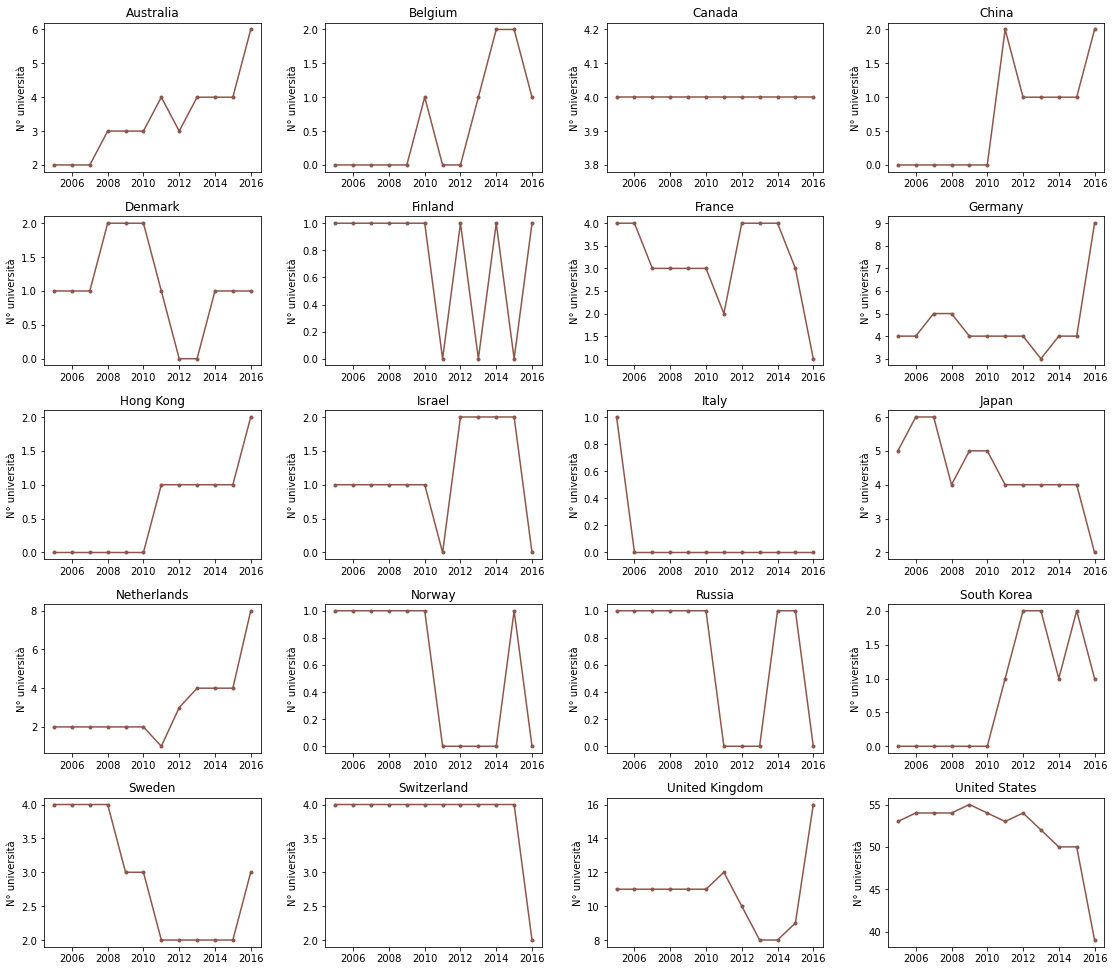

In [83]:
from matplotlib.ticker import FormatStrFormatter
seldf100 = sumdf100iso[sumdf100iso['country'].isin(['United States','United Kingdom','Germany','Netherlands',
                                    'Japan','Australia','Switzerland','Canada','France','Sweden','China','Italy',
                                    'Spain','Israel','Denmark','Belgium','South Korea','Finland',
                                    'Hong Kong','Norway','Russia'])]

seldf100['Year'] = seldf100['Year'].astype('int64')
fig = plt.figure(figsize=(19,17))

for c,num in zip(seldf100['country'], range(1,21)):
    
    df0=seldf100[seldf100['country']==c]
    ax = fig.add_subplot(5,4,num)
    ax.grid(True)
    df0.plot(x='Year',y ='Numero di università',title=c, ax=ax, legend=False,marker=".",color="tab:brown")
    ax.set_ylabel('N° università')
    ax.set_xlabel('')
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    
plt.show()

Analizzo singolarmente nazione per nazione l'andamento annuale del numero di università in Top 100. Gli Stati Uniti che sono stati sempre al top presentano comunque una discesa dal 2013 in poi. Il Regno Unito invece più o meno stabile fino al 2011, poi discesa fino al 2014, poi di nuovo in salita. Quasi sempre in crescita negli anni vediamo l'Australia, la Germania, l'Olanda, Hong Kong. In discesa costante invece Giappone e sembrerebbe la Francia negli ultimissimi anni. Gli altri paesi sono più o meno stabili o leggermente altalenanti ma comunque niente da segnalare.

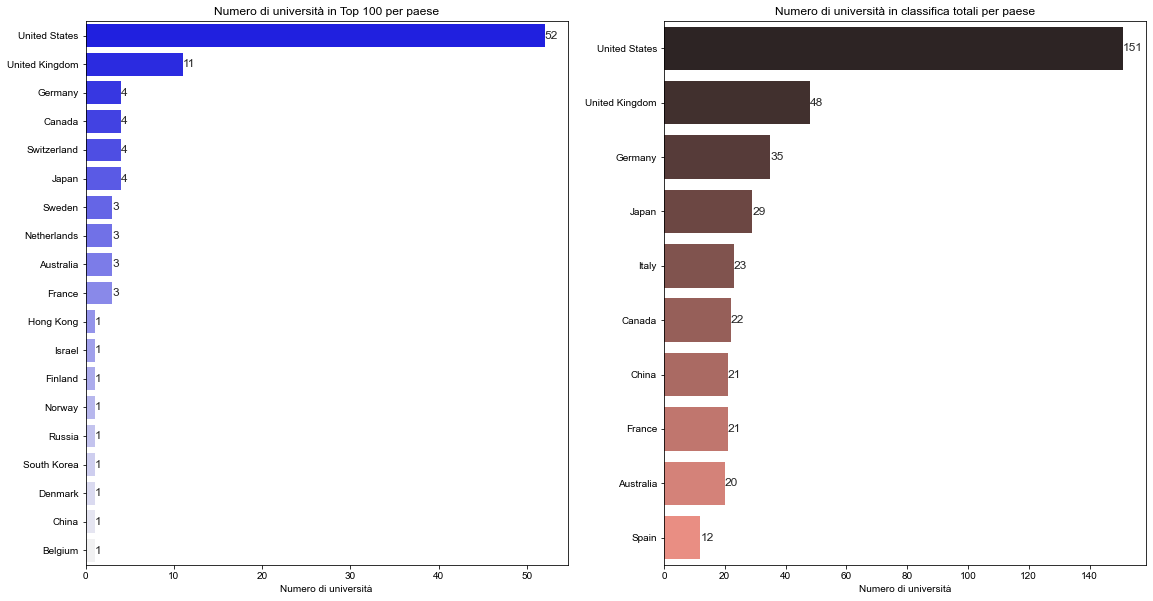

In [84]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))

sns.barplot(ax=axes[0],x=df100mean.head(19)['Numero di università'], y=df100mean.head(19)['country'],palette="light:b_r")
axes[0].set_title("Numero di università in Top 100 per paese")
sns.barplot(ax=axes[1],x=dfmean['Numero di università'].head(10), y=dfmean['country'].head(10),palette="dark:salmon")
sns.set_theme(color_codes=True)
axes[1].set_title("Numero di università in classifica totali per paese")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,)
for i in axes[1].containers:
    axes[1].bar_label(i,)
plt.show()

Un riepilogo di quello che si è visto fino ad adesso, a sinistra i paesi con più università in Top 100, sulla destra la classifica dei paesi con più università totali presenti nei 3 ranking analizzati precedentemente. Si vede bene il netto vantaggio degli Stati Uniti sulle altre su entrambe le classifiche. Considerando le due "Top 10" troviamo quasi gli stessi paesi, fatta eccezione per Italia e Spagna che non hanno università presenti in Top 100 ma hanno invece un numero alto di università totali prese in considerazione dai 3 rankings (quindi di medio/alto livello). Svizzera (4 università in top 100), Olanda (3 università in Top 100) e Svezia (3 università in top 100) hanno poche università totali ma riescono a presentarne un buon numero in Top 100.

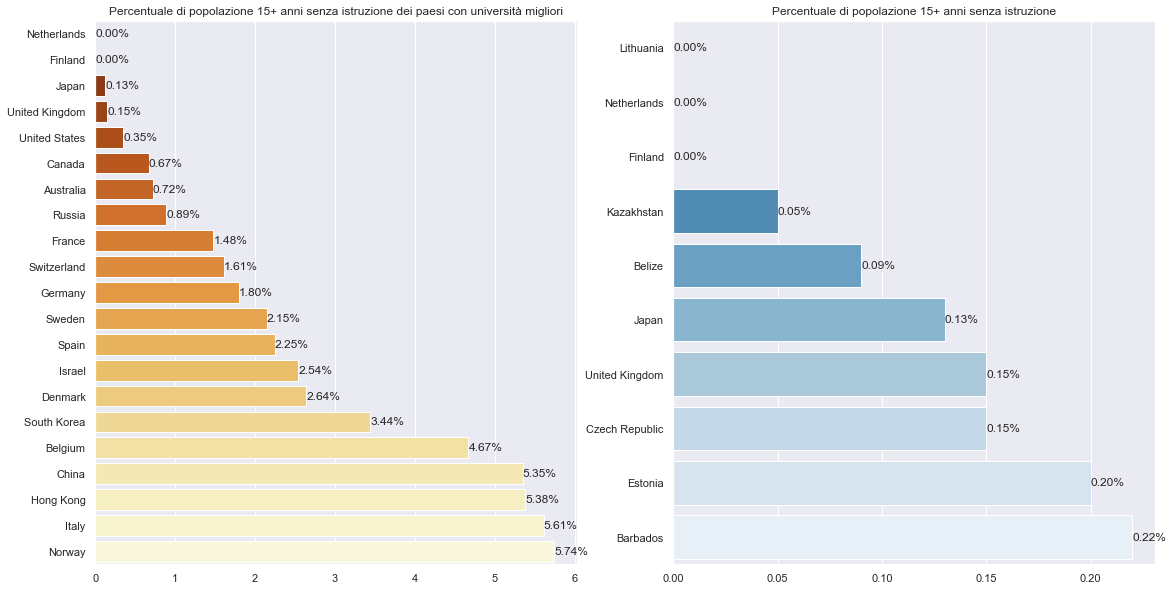

In [85]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))
sns.barplot(ax=axes[1],x=noed15d['15+ senza istruzione'].head(10), y=noed15d['country'].head(10),palette="Blues_r")
axes[1].set_title("Percentuale di popolazione 15+ anni senza istruzione")
sns.barplot(ax=axes[0],x=selnoed15d['15+ senza istruzione'], y=selnoed15d['country'],palette="YlOrBr_r")
axes[0].set_title("Percentuale di popolazione 15+ anni senza istruzione dei paesi con università migliori")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 
axes[0].set_xlabel('') 
axes[1].set_xlabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')

Andiamo ad analizzare la percentuale di popolazione per paese sopra i 15 anni con nessun tipo di istruzione per dare un'idea generale di quanto un popolo è istruito. Ovviamente in questo caso più il dato è basso, meglio è. Troviamo ai primi posti Lituania, Olanda e Finlandia che presentano un encomiabile 0%. La Top 10 generale che vediamo a destra presenta anche delle sorprese come Kazakhstan, Belize, Repubblica Ceca, Estonia e Barbados che hanno tutte un livello di popolazione non istruita bassissimo. Ottimi risultati per Giappone, Stati Uniti, Canada, Australia e Russia tutte con meno dell'1% di popolazione non istruita. Agli ultimi posti troviamo Cina (5%), Hong Kong (5%), Italia (6%) e Norvegia (6%).

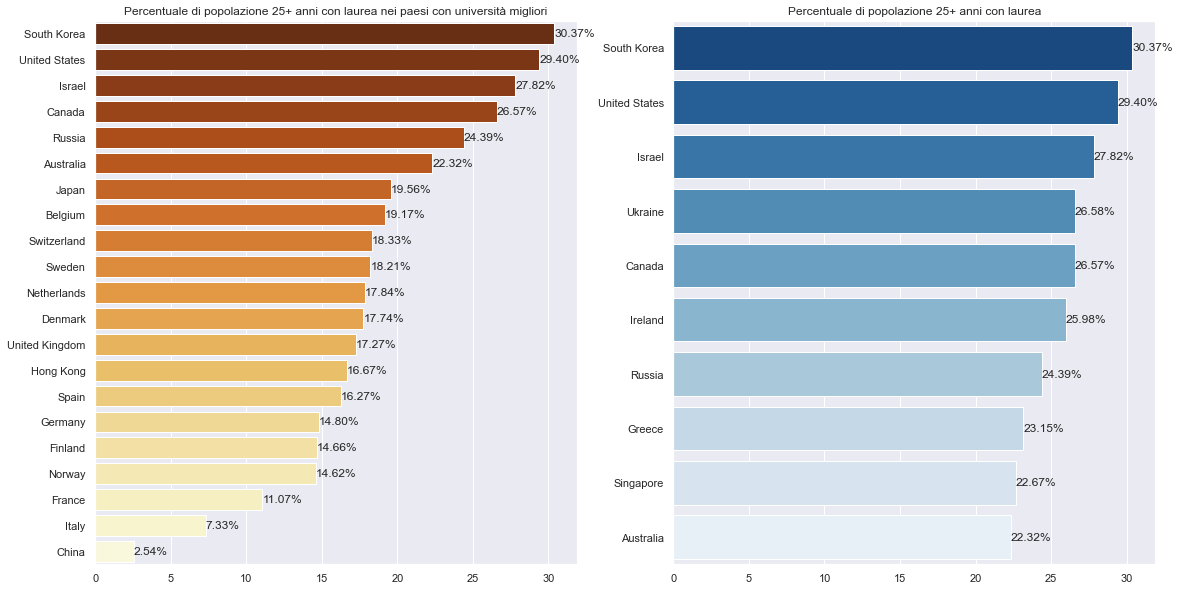

In [86]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))
sns.barplot(ax=axes[1],x=tertiary252['25+ con laurea completata'].head(10), y=tertiary252['country'].head(10),palette="Blues_r")
axes[0].set_title("Percentuale di popolazione 25+ anni con laurea nei paesi con università migliori")
sns.barplot(ax=axes[0],x=seltertiary252['25+ con laurea completata'], y=seltertiary252['country'],palette = "YlOrBr_r")
axes[1].set_title("Percentuale di popolazione 25+ anni con laurea")
axes[0].set_ylabel('')
axes[1].set_ylabel('') 
axes[0].set_xlabel('')
axes[1].set_xlabel('')
for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')

plt.show()

Entriamo nello specifico delle università andando a vedere quali sono i paesi che presentano più laureati nella popolazione sopra i 25 anni. Su entrambe le classifiche troviamo al top a sorpresa la Corea del Sud (30%), subito sotto Stati Uniti (29%) e Israele (28%). Ben piazzate Canada (27%), Russia (23%) e Australia (22%). Ultimi posti della "nostra" classifica per Francia (11%), Italia (7%) e Cina (meno del 3%, dato veramente basso paragonato agli altri). Il Regno Unito (17%) si trova nella metà bassa della classifica, quindi nonostante università di alto livello i britannici si laureano relativamente poco. Ucraina (27%), Irlanda (26%) e Grecia (23%) comunque da tenere d'occhio se salta fuori qualche altro dato interessante su di loro.

In [87]:
fig = px.histogram(aget2, x="country", y="2010",color="Indicator Name",color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_layout(
    autosize=False,
    width=975,
    height=600,legend_title="Età",title="% di laureati per paese classificati per età",yaxis_title="",xaxis_title="")
fig.update_yaxes(showticklabels=False)
fig.show()

Questo grafico contiene la percentuale di laureati divisa per fascia d'età divisa dai colori prendendo in considerazione solo l'anno 2010 che è l'ultimo anno disponibile. Ho scelto dei colori molto accesi e molto diversi da loro per dare uno stacco netto tra le fasce d'età ed evitare fraintendimenti. 

In rosso troviamo la fascia 25+, quindi praticamente tutta la popolazione "laureabile", al primo posto Corea del Sud con un 35%, seguono Stati Uniti (31%), Hong Kong (30%) e Israele (29%). In fondo alla classifica le "solite" Italia (8%) e Cina (2%). Saltano all'occhio nelle fasce 25-29, 30-34 e 35-39 le percentuali altissime della Corea del Sud (60% - 62% - 51%), facendo un confronto con gli Stati Uniti (33% - 34% - 35%) si nota innanzitutto la netta differenza di percentuali di laureati in queste fasce d'età, ma anche una tendenza invertita: mentre in Corea del Sud man mano che l'età si abbassa la loro percentuale si alza, negli Stati Uniti invece sembra l'opposto. In alcune di queste fasce "giovani" anche Canada (34% - 36% - 35%) e Giappone (35% - 36% - 32%) superano gli Stati Uniti. Hong Kong si nota pure che ogni volta che la fascia di età diminuisce la percentuale di laureati aumenta di molto.

Dalla fascia 45 in su gli Stati Uniti invece ottengono sempre il primo posto, è emblematica la fascia 75+ in cui gli Stati Uniti presentano un 20% di laureati, tantissimi rispetto a Corea del Sud (5%) e Giappone (4%). In questa fascia troviamo al secondo posto l'Australia (19%), Israele (18%) e il Canada (13%), questo sta a dimostrare che questi sono i paesi in cui gli abitanti si laureano "da più tempo" ma che negli anni rispetto ad altri paesi non sembrano aver migliorato più di tanto questo dato anche se tutti loro presentano ottime percentuali in tutte le fasce d'età. 

Interessanti i dati della Cina che nonostante sembrano dati piccoli presentano un 6% nella fascia 25-29 rispetto al 2% della popolazione totale 25+, quindi dato praticamente triplicato che dimostra che anche loro sono in crescita (tutte asiatiche quelle con i giovani con i dati più migliorati). I dati della Cina sono sempre particolari perchè bisogna considerare che è una popolazione grandissima, sotto dittatura e con una grande differenza di possibilità e mentalità tra città e zone rurali.

Stupiscono in negativo i dati della Finlandia e in parte della Norvegia, soprattutto la prima ogni volta che diminuisce la fascia di età diminuisce anche la percentuale di laureati, decisamente in controtendenza con quello che succede nel resto del mondo. La Norvegia invece quasi immobile.

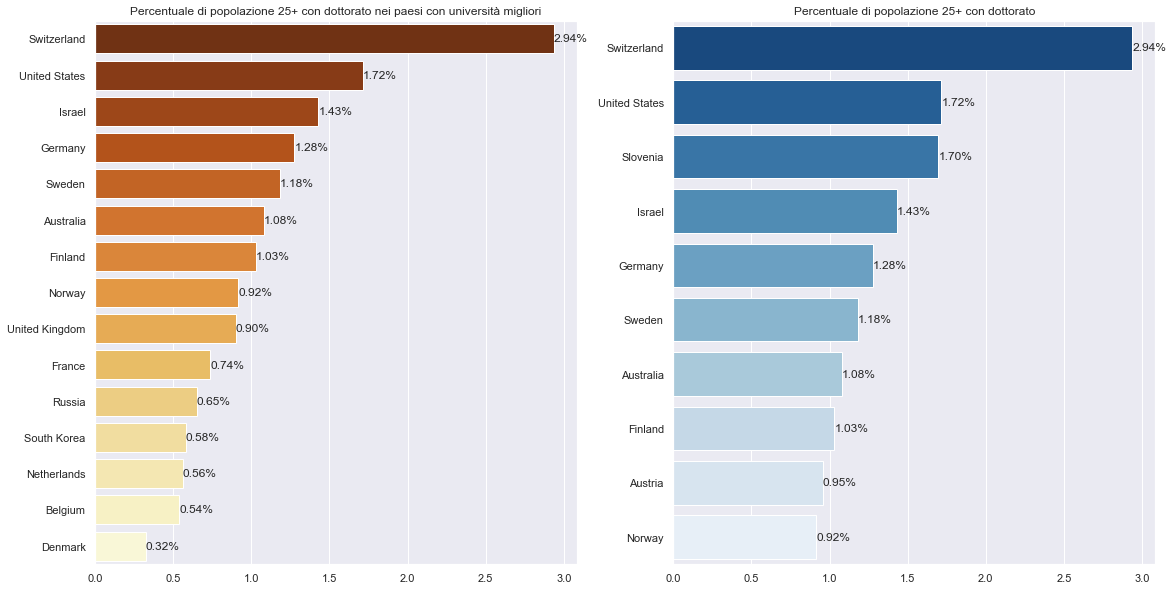

In [88]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))
sns.barplot(ax=axes[1],x=dd252['25+ con dottorato'].head(10), y=dd252['country'].head(10),palette="Blues_r")
axes[1].set_title("Percentuale di popolazione 25+ con dottorato")
sns.barplot(ax=axes[0],x=seldd252['25+ con dottorato'], y=seldd252['country'],palette = "YlOrBr_r")
axes[0].set_title("Percentuale di popolazione 25+ con dottorato nei paesi con università migliori")
axes[0].set_ylabel('')
axes[1].set_ylabel('') 
axes[0].set_xlabel('')
axes[1].set_xlabel('')
for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')


plt.show()

Qui possiamo osservare la percentuale di popolazione sopra i 25 anni con un dottorato, vediamo che i numeri si abbassano radicalmente rispetto ai precedenti, quindi si può dire per tutti i paesi che solo una piccolissima parte di chi si laurea poi prosegue fino al dottorato. Si può osservare che le due classifiche sono quasi uguali, nella classifica di destra differiscono solo Slovenia al terzo posto e Austria che nella "nostra" classifica non abbiamo considerato. Il fatto che ci sia questa somiglianza tra le due potrebbe essere un punto a favore per una correlazione positiva tra paesi con università migliori e di conseguenza paesi più istruiti. La Svizzera ha il miglior risultato con il 3% di popolazione con un dottorato. Stati Uniti al secondo posto.

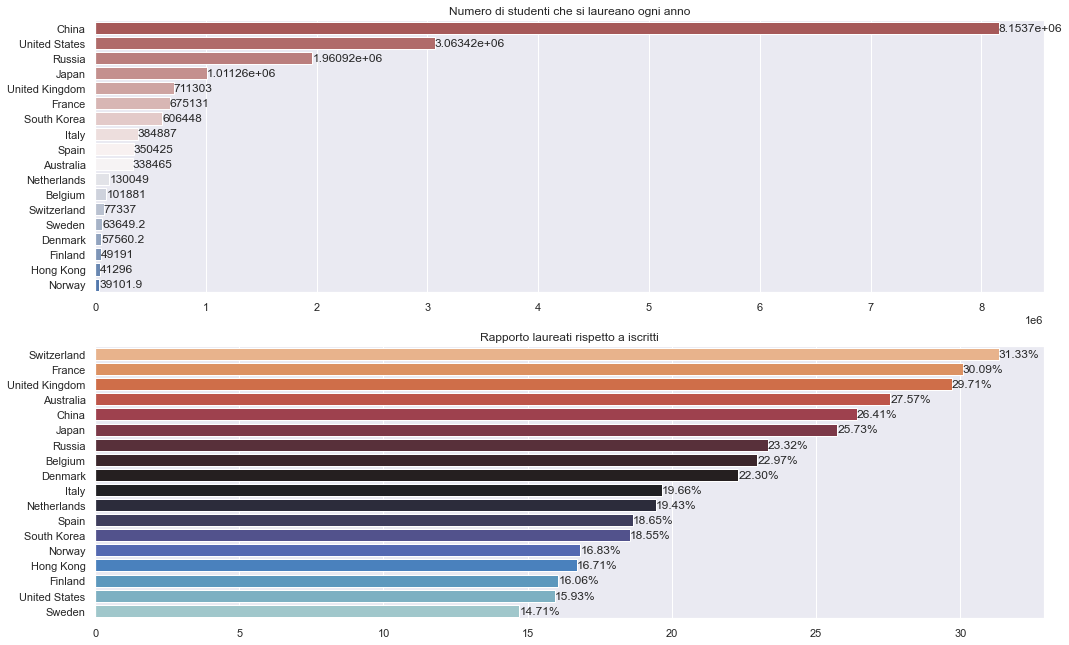

In [89]:
fig, axes = plt.subplots(2, 1,figsize=(17, 11))
sns.barplot(ax=axes[1],x=rapplaurea['Rapporto laureati su iscritti'], y=rapplaurea['country'],palette="icefire_r")
axes[1].set_title("Rapporto laureati rispetto a iscritti")
sns.barplot(ax=axes[0],x=rapplaurea.sort_values("Laureati",ascending=False)['Laureati'], y=rapplaurea.sort_values(
    "Laureati",ascending=False)['country'],palette="vlag_r")
axes[0].set_title("Numero di studenti che si laureano ogni anno")
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 
axes[0].set_xlabel('') 
axes[1].set_xlabel('') 

for i in axes[0].containers:
    axes[0].bar_label(i)
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')

Nel primo grafico si vede il numero di studenti che ogni anno si laureano in ogni paese. Al primo posto la Cina con 8 milioni di laureati all'anno, al secondo posto gli Stati Uniti con 3 milioni, al terzo la Russia con quasi 2 milioni. Chiaramente influisce molto la popolazione su questi dati, ovviamente più abitanti si hanno più è altamente probabile che i laureati siano di più numericamente (analizzerò questo dato appena sotto). Nel secondo grafico si vede il rapporto tra laureati e iscritti, quindi l'efficienza" di ogni università. Ogni anno rispetto al numero di iscritti se ne laureano il 31% in Svizzera, il 30% in Francia e nel Regno Unito. Gli Stati Uniti in questa particolare classifica finiscono penultimi con un dato del 16%, praticamente confrontando col dato precedente hanno un numero di laureati molto alto ma rispetto a quanti frequentano l'università il dato è molto basso. Ultimo posto per la Svezia con il 14%. Posizione abbastanza bassa anche per la Corea del Sud con un 17%. Ottimi risultati per Australia (26%), China (26%), Giappone (23%) e Russia (23%). La Cina nonostante il basso il risultato nei dati valutati fino adesso sull'istruzione del paese dimostra quindi di avere un'università "efficiente".

500

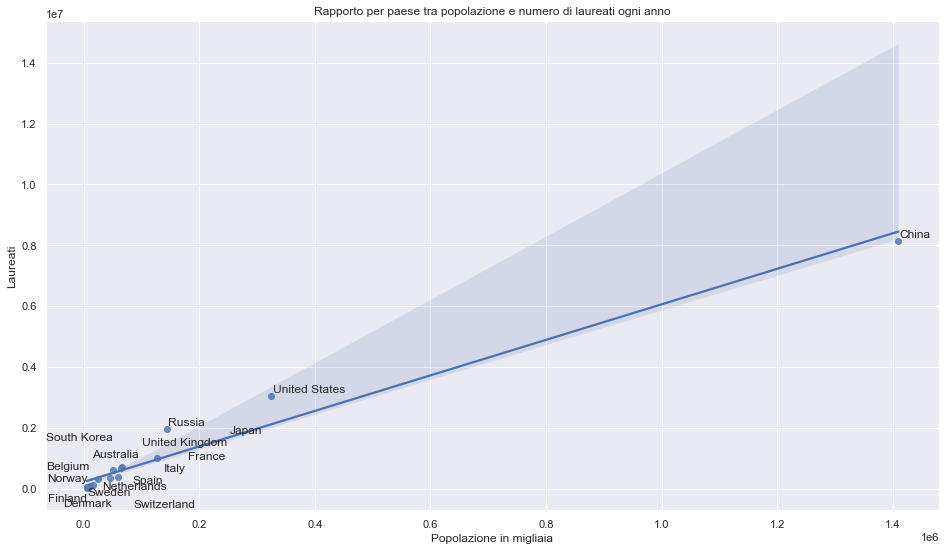

In [90]:
df_flist2 = df_flist.loc[:,['country','Laureati','Popolazione in migliaia']]
df_flist2.dropna(inplace=True)
df_flist2.reset_index(inplace=True)

plt.rcParams['figure.figsize']=16,9
x= df_flist2['Popolazione in migliaia']
y= df_flist2['Laureati']
sns.set_theme(color_codes=True)
ax = sns.regplot(x, y,data=df_flist2,ci=80,color="b")
ax.grid(True)

plt.title("Rapporto per paese tra popolazione e numero di laureati ogni anno")
plt.xlabel("Popolazione in migliaia")
plt.ylabel("Laureati")
textsus=[]

for i, txt in enumerate(df_flist2['country']):
    textsus.append(ax.text(df_flist2['Popolazione in migliaia'][i], df_flist2['Laureati'][i], txt))
    
adjust_text(textsus)

Con questo grafico ho voluto rappresentare come sono correlati il numero di laureati ogni anno per paese rispetto alla popolazione, come prevedibile si nota subito una correlazione: a paese con più abitanti corrisponde un numero più alto di laureati. Considerando il fascio di luce blu come quello in cui si è in "media" si può capire che la Cina in realtà sta sotto la media, ha molti laureati ma dovrebbe averne molti di più rispetto alla popolazione che ha. Col grafico successivo escludendo Stati Uniti e Cina si vedranno meglio nel dettaglio gli altri paesi.

56

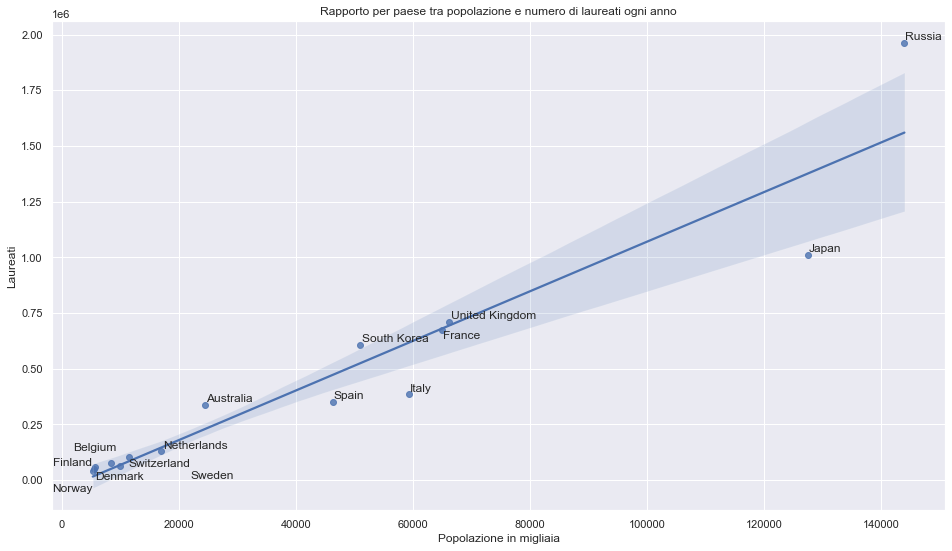

In [91]:
df_flist2nochus = df_flist2.copy()
df_flist2nochus.drop([0,13],axis=0,inplace=True)
df_flist2nochus.reset_index(inplace=True)

plt.rcParams['figure.figsize']=16,9
x= df_flist2nochus['Popolazione in migliaia']
y= df_flist2nochus['Laureati']
sns.set_theme(color_codes=True)
ax = sns.regplot(x, y,data=df_flist2nochus,ci=80,color="b")
ax.grid(True)
plt.title("Rapporto per paese tra popolazione e numero di laureati ogni anno")
plt.xlabel("Popolazione in migliaia")
plt.ylabel("Laureati")
textsus=[]

for i, txt in enumerate(df_flist2nochus['country']):
    textsus.append(ax.text(df_flist2nochus['Popolazione in migliaia'][i], df_flist2nochus['Laureati'][i], txt))
    
adjust_text(textsus)

Escludendo Cina e Stati Uniti la correlazione sale ancora di più (più la linea è obliqua più c'è correlazione), si può notare come la Russia ha i dati migliori, ha sia numero di laureati molto più alto degli altri ma anche in proporzione al numero di abitanti è quella che ne ha di più. Italia, Spagna e Giappone invece all'opposto dovrebbero avere più laureati per essere in linea con gli altri paesi (semplificando: chi si trova sopra al di sopra del fascio blu ha un dato positivo, chi si trova sotto ha un dato negativo).

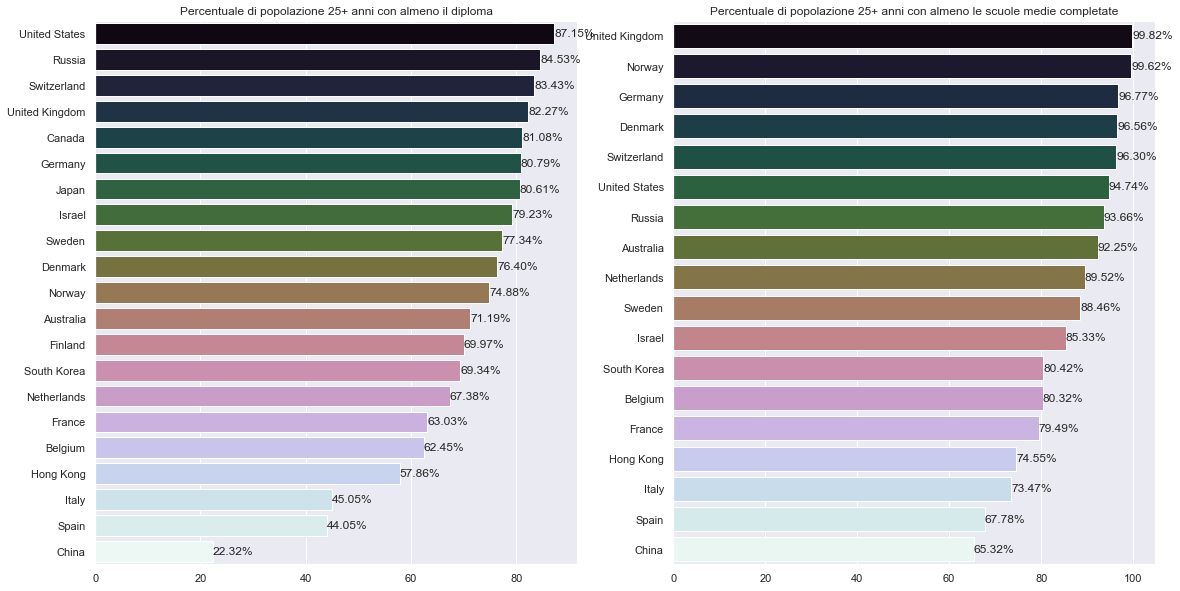

In [92]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))
sns.barplot(ax=axes[1],x=selmed252['25+ almeno scuola media'], y=selmed252['country'],palette = "cubehelix")
axes[1].set_title("Percentuale di popolazione 25+ anni con almeno le scuole medie completate")
sns.barplot(ax=axes[0],x=selupse252['25+ almeno il diploma'], y=selupse252['country'],palette = "cubehelix")
axes[0].set_title("Percentuale di popolazione 25+ anni con almeno il diploma")
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')


plt.show()

Per avere un quadro generale dell'istruzione del paese analizziamo anche la percentuale di diplomati sopra i 25 anni e di popolazione sopra i 25 anni che ha completato le scuole medie. Per quanto riguarda il diploma troviamo ai primi posti Stati Uniti (87%), Russia (85%), Svizzera (83%), Regno Unito (82%), Canada (81%). Ultimi posti anche in questo caso per Italia (45%), Spagna (44%) e Cina (22%). Riguardo la classifica delle scuole medie troviamo Regno Unito e Norvegia entrambe praticamente col 100% di popolazione sopra i 25 anni che ha completato almeno le scuole medie. Facendo un paragone con gli Stati Uniti (95% completamento scuole medie) si può dire che in Regno Unito e in Norvegia in proporzione sono in pochi quelli che dopo le scuole medie completano le superiori. Cina (65%), Spagna (67%) e Italia (73%) si avvicinano alle altre ma rimangono agli ultimi posti anche in questa classifica.

In [93]:
trace1 = go.Bar(x = selpisa['country'],
                    y = selpisa['Media PISA'],
                name = "Media",
                marker = dict(color = "rgba(35, 239, 196, 1)",
                              line = dict(color = "rgb(0,0,0)",width =1.5)))

trace2 = go.Bar(x = selperread2['country'],
                    y = selperread2['PISA: Performance reading'],
                name = "Reading",
                marker = dict(color = "rgba(145, 67, 138, 0.7)",
                              line = dict(color = "rgb(0,0,0)",width =1.5)))

trace3 = go.Bar(x = selpermat2['country'],
                    y = selpermat2['PISA: Performance matematica'],
                name = "Math",
                marker = dict(color = "rgba(216, 117, 116, 0.7)",
                              line = dict(color = "rgb(0,0,0)",width =1.5)))

trace4 = go.Bar(x = selpersci2['country'],
                    y = selpersci2['PISA: Performance science'],
                    name = "Science",
                    marker = dict(color = "rgba(219,239,47,0.7)",
                                  line = dict(color = "rgb(0,0,0)",width = 1.5)))



data = [trace1,trace2,trace3,trace4]

layout = go.Layout(barmode = "group")



fig = go.Figure(data = data,layout = layout,layout_yaxis_range=[450,585])

fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 450,
        dtick = 10
    ),title="PISA: Risultati"
)

**Programme for International Student Assessment(meglio noto con l'acronimo PISA)** *è un'indagine internazionale promossa dall'OCSE nata con lo scopo di valutare il livello di istruzione degli adolescenti dei principali paesi industrializzati.*

Praticamente vengono fatti dei test ai ragazzi di circa 15 anni negli ambiti di alfabetizzazione letteraria, matematica e scientifica e viene poi dato un punteggio. Voglio usare questi dati per dare delle info "extra" sulla preparazione della popolazione che non sia solo il titolo di studio. Nelle prime 5 posizioni troviamo Cina, Hong Kong, Corea del Sud, Finlandia e Giappone, praticamente 4 su 5 sono asiatiche. Il fatto che Regno Unito e soprattutto Stati Uniti si trovino nella parte bassa della classifica indica che quanto meno fino ai 15 anni i loro ragazzi stanno indietro rispetto alla maggior parte degli altri paesi analizzati. Ultimi tre posti per Italia (purtroppo in basso anche qui) e a sorpresa Russia e Israele che comunque come abbiamo visto dai dati precedenti sembrano un popolo "ufficialmente" molto istruito.

In [94]:
trace1 = go.Bar(x = selpiaac['country'],
                    y = selpiaac['Media PIAAC'],
                    name = "Media",
                    marker = dict(color = "rgba(35, 239, 196, 1)",
                                  line = dict(color = "rgb(0,0,0)",width = 1.5)))

trace2 = go.Bar(x = selpiaac['country'],
                    y = selnp2['PIAAC: Performance Numeracy'],
                    name = "Numeracy",
                    marker = dict(color = "rgba(216, 117, 116, 0.7)",
                                  line = dict(color = "rgb(0,0,0)",width = 1.5)))
trace3 = go.Bar(x = selpiaac['country'],
                    y = sellp2['PIAAC: Performance Literacy'],
                name = "Literacy",
                marker = dict(color = "rgba(145, 67, 138, 0.7)",
                              line = dict(color = "rgb(0,0,0)",width =1.5)))



data = [trace1,trace2,trace3]

layout = go.Layout(barmode = "group")



fig = go.Figure(data = data,layout = layout,layout_yaxis_range=[200,300])

fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 200,
        dtick = 25
    ),title="PIAAC: Risultati"
)

fig.show()

**PIAAC, Programme for the International Assessment of Adult Competencies**, *è un Programma promosso dall'OCSE, l'Organizzazione per la Cooperazione e lo Sviluppo Economico e destinato alla valutazione delle competenze della popolazione adulta tra i 16 ed i 65 anni di età. Il Programma di ricerca risponde all'obiettivo di fornire dati aggiornati, e comparabili a livello internazionale, sulle competenze degli adulti nei Paesi OCSE, informazioni utili alla definizione e l'aggiornamento delle politiche educative e del lavoro, sia a livello nazionale che internazionale.*

*PIAAC studia le competenze definite dall'OCSE foundations skills, considerate oggi fondamentali per vivere e lavorare e in particolare competenze sulla lettura (Literacy), sulle abilità logico-matematiche (Numeracy) e sulle competenze collegate alle tecnologie dell'informazione e comunicazione (problem solving in ambienti tecnologicamente avanzati). Inoltre, per la prima volta in uno studio internazionale, l'indagine PIAAC fornisce indicazioni su come le persone fanno uso delle competenze non solo nella loro vita personale, ma anche durante la loro attività lavorativa.*

Diamo quindi un'occhiata alle competenze del mondo adulto, purtroppo mancano dai test alcuni paesi come Cina, Hong Kong, Regno Unito, Belgio però comunque si possono ricavare informazioni interessanti. Anche qui troviamo al primo posto il Giappone e subito dopo la Finlandia, con tutta la prima metà composta per buona parte da paesi del Nord Europa. Anche qui per gli Stati Uniti parte bassa della classifica, la popolazione americana non è la più preparata neanche a livello adulto. Particolare il risultato della Corea del Sud in confronto a quello del PISA in cui si trovava molto in alto, probabilmente dovuto al fatto che come abbiamo visto l'istruzione in queto paese sta avendo un cambiamento importante e quindi incide molto la fascia di età alta. Italia e Spagna raggiungono pessimi risultati anche qui.

Aggiungo un dettaglio sfruttando i dati di Finlandia e Norvegia: avevamo visto in precedenza che Finlandia e Norvegia avevano dati non proprio ottimi sulla percentuale di laureati nel paese (soprattutto nelle fasce d'età più giovani non c'era crescita) eppure qui le troviamo ai primi posti; le prime 3 posizioni coincidono però perfettamente con quelle dei paesi con tasso più basso di popolazione senza nessuna istruzione, quindi in Giappone, Finlandia e Olanda tutta la popolazione ha fatto almeno scuola elementare, ma pochi raggiungono livelli di istruzione alti. **Da questi dati si può certamente dire che a paese più ufficialmente istruito non corrisponde un paese più preparato e competente**.

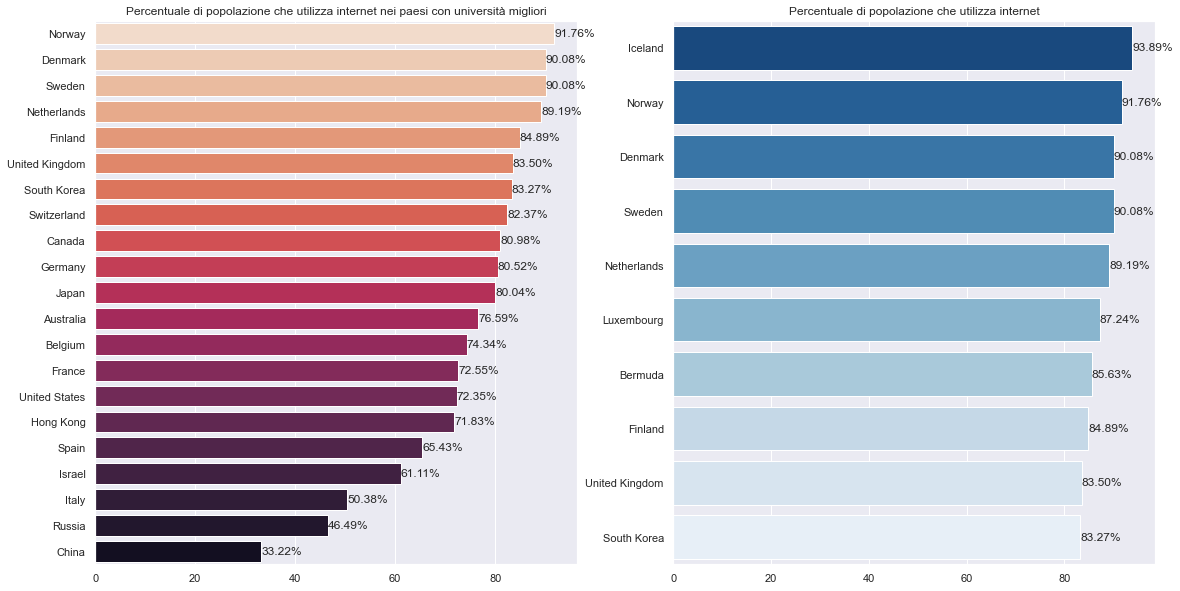

In [95]:
fig, axes = plt.subplots(1, 2,figsize=(19, 10))
sns.barplot(ax=axes[1],x=intuser2['% internet users'].head(10), y=intuser2['country'].head(10),palette= "Blues_r")
axes[0].set_title("Percentuale di popolazione che utilizza internet nei paesi con università migliori")
sns.barplot(ax=axes[0],x=selintuser2['% internet users'], y=selintuser2['country'],palette="rocket_r")
axes[1].set_title("Percentuale di popolazione che utilizza internet")
axes[0].set_ylabel('')
axes[1].set_ylabel('') 
axes[0].set_xlabel('')
axes[1].set_xlabel('')
for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')


plt.show()

Un altro dato "extra": ho deciso di analizzare anche questo dato particolare perchè ritengo l'utilizzo di internet oggi un parametro importante da valutare, oggi il mondo si muove sempre più col digitale (su internet ci si informa, si studia e si lavora) e quindi è giusto valutare quanto un paese sia "istruito digitalmente".

Questi dati danno un'ulteriore conferma di ciò che abbiamo notato nel grafico precedente, i paesi più utilizzatori di internet sono tutti nel Nord Europa: Islanda al primo posto con un 94%, a seguire Norvegia (92%), Danimarca (90%), Svezia (90%), Olanda (89%), Lussemburgo (87%), Finlandia (85%) Piazzamenti in Top 10 anche per Regno Unito (83%) e Corea del Sud (83%). Gli Stati Uniti che sono comunemente considerati il paese tecnologico per eccellenza presentano invece un 72%, una bella differenza da questo punto di vista con il Nord Europa. Agli ultimi posti della nostra classifica (praticamente come nella classifica PIAAC) troviamo Spagna (65%), Isarele (61%), Italia (50%), Russia (46%) e Cina (33%).

**Se ne può dedurre che oggi saper usare internet dia un grande vantaggio nell'apprendimento di abilità e competenze, i paesi che stanno indietro da questo punto di vista dovrebbero puntare il prima possibile a potenziare dato.**

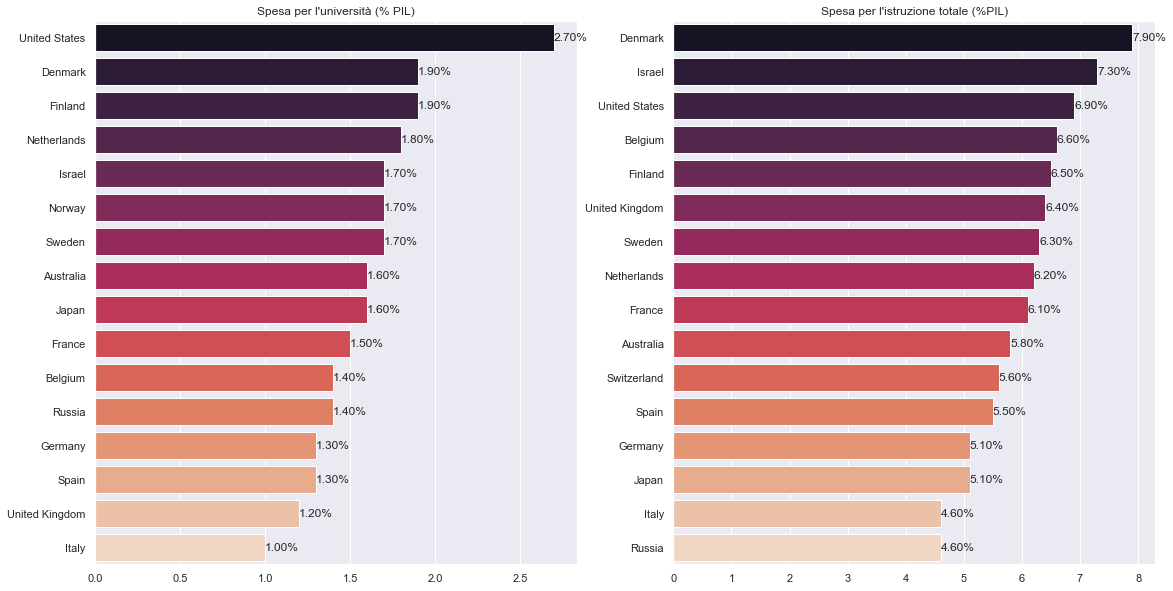

In [96]:
total_all2.dropna(inplace=True)
totalh2.dropna(inplace=True)

fig, axes = plt.subplots(1, 2,figsize=(19, 10))
sns.barplot(ax=axes[1],x=total_all2.sort_values("Spesa per l'istruzione (% PIL)",ascending=False)
            ["Spesa per l'istruzione (% PIL)"], y=total_all2.sort_values("Spesa per l'istruzione (% PIL)",ascending=False)[
                'country'],palette="rocket")
axes[0].set_title("Spesa per l'università (% PIL)")
sns.barplot(ax=axes[0],x=totalh2.sort_values("Spesa per l'università (% PIL)",ascending=False)
            ["Spesa per l'università (% PIL)"], y=totalh2.sort_values("Spesa per l'università (% PIL)",ascending=False)[
                'country'],palette="rocket")
axes[1].set_title("Spesa per l'istruzione totale (%PIL)")
axes[0].set_ylabel('')
axes[1].set_ylabel('') 
axes[0].set_xlabel('')
axes[1].set_xlabel('')
for i in axes[0].containers:
    axes[0].bar_label(i,fmt='%.2f%%')
for i in axes[1].containers:
    axes[1].bar_label(i,fmt='%.2f%%')


plt.show()

In questi due grafici si può osservare a sinistra la spesa (% del PIL) che ogni paese affronta ogni anno per l'università, mentre a destra la spesa per tutta l'istruzione in generale. 

Per l'università al primo posto si trovano gli Stati Uniti che spendono il 2.7% del loro PIL per l'Università, con un bel distacco seguono Danimarca (1.9%), Finlandia (1.9%) e Olanda (1.8%). Colpisce il dato del Regno Unito che nonostante un numero di università di alto molto alto si trova al penultimo posto in questa classifica con l'1.20% di spesa appena davanti all'Italia che spende l'1%.

Per quanto riguarda la spesa per l'istruzione totale ai primi due posti abbiamo Danimarca (7.9%) e Israele (7.3%) a cui seguono gli Stati Uniti con un 6.9%. Si può notare da questi dati che gli Stati Uniti riservano molti più soldi per l'università rispetto agli altri livelli di istruzione facendo un paragione con gli altri paesi. A differenza per esempio del Regno Unito che si trova abbastanza in alto in questa classifica spendendo il 6.4% del PIL nell'istruzione in generale, concentrando la maggior parte dei soldi negli altri percorsi scolastici.

In [97]:
df_flist_m = df_flist.copy()
df_flist_m2 = df_flist_m[df_flist_m['Miliardi di dollari spesi per università'].notna()]
df_flist_m2.reset_index(inplace=True)

Text(0.5, 1.0, "Miliardi di dollari spesi per l'università")

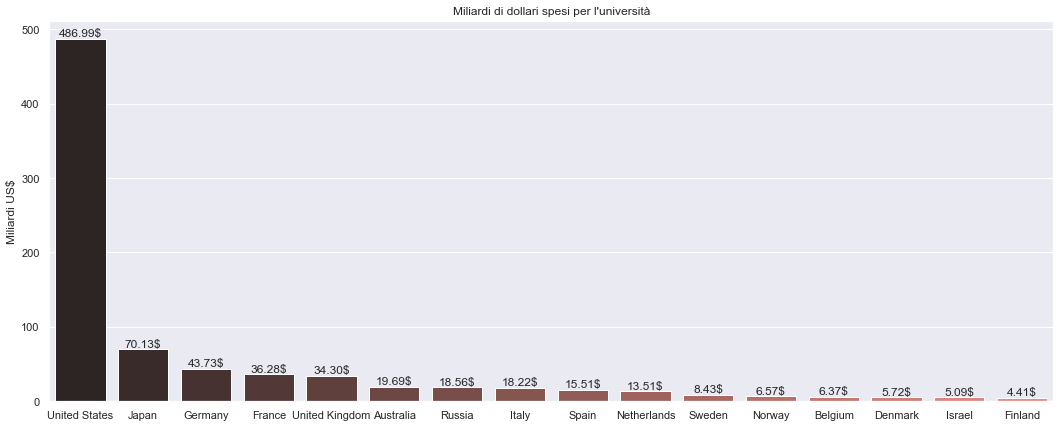

In [98]:
plt.figure(figsize=(18,7))
fig=sns.barplot(x=df_flist_m2.sort_values('Miliardi di dollari spesi per università',ascending=False)['country'],
            y=df_flist_m2.sort_values('Miliardi di dollari spesi per università', 
                                  ascending=False)['Miliardi di dollari spesi per università'],palette="dark:salmon")

plt.ylabel('Miliardi US$')
plt.xlabel('')
for i in fig.containers:
    fig.bar_label(i,fmt='%.2f$')
plt.title("Miliardi di dollari spesi per l'università")

Una visione nettamente più chiara ci viene data dalla quantità reale di miliardi di dollari spesi per l'università da ogni paese. Tra il primo e il secondo posto c'è praticamente un abisso, gli Stati Uniti spendono 486 miliardi all'anno per l'università, il Giappone al secondo posto 70 miliardi. Questo potrebbe effettivamente essere il motivo per cui gli Stati Uniti riescono ad avere le università migliori. Nel successivo grafico vedremo meglio questa correlazione tra soldi spesi e università migliori.

28

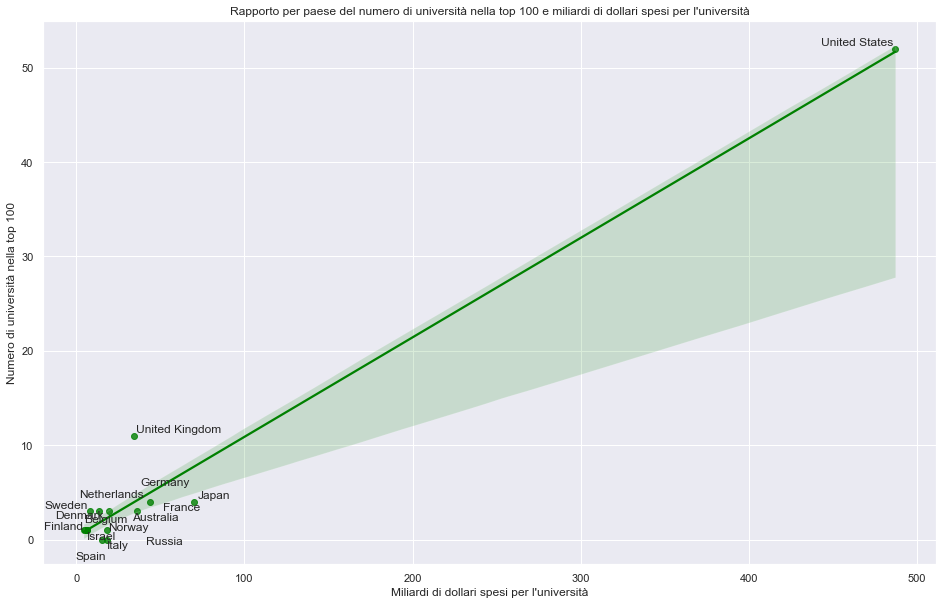

In [99]:
plt.rcParams['figure.figsize']=16,10
x= df_flist_m2['Miliardi di dollari spesi per università']
y= df_flist_m2['Numero di università']
sns.set_theme(color_codes=True)
ax = sns.regplot(x, y,data=df_flist_m2,ci=80,color="green")
ax.grid(True)
plt.title("Rapporto per paese del numero di università nella top 100 e miliardi di dollari spesi per l'università")
plt.xlabel("Miliardi di dollari spesi per l'università")
plt.ylabel("Numero di università nella top 100")
textsus=[]

for i, txt in enumerate(df_flist_m2['country']):
    textsus.append(ax.text(df_flist_m2['Miliardi di dollari spesi per università'][i], df_flist_m2['Numero di università'][i], txt))
    
adjust_text(textsus)

Si nota subito che la correlazione tra miliardi di dollari spesi e numero di università in top 100 per paese è molto alta. Gli americani spendono tantissimi soldi per l'università e ne ottengono risultati giustamente ben diversi dagli altri. Nel grafico successivo eliminando gli Stati Uniti riusciamo a vedere meglio come si comportano gli altri paesi.

124

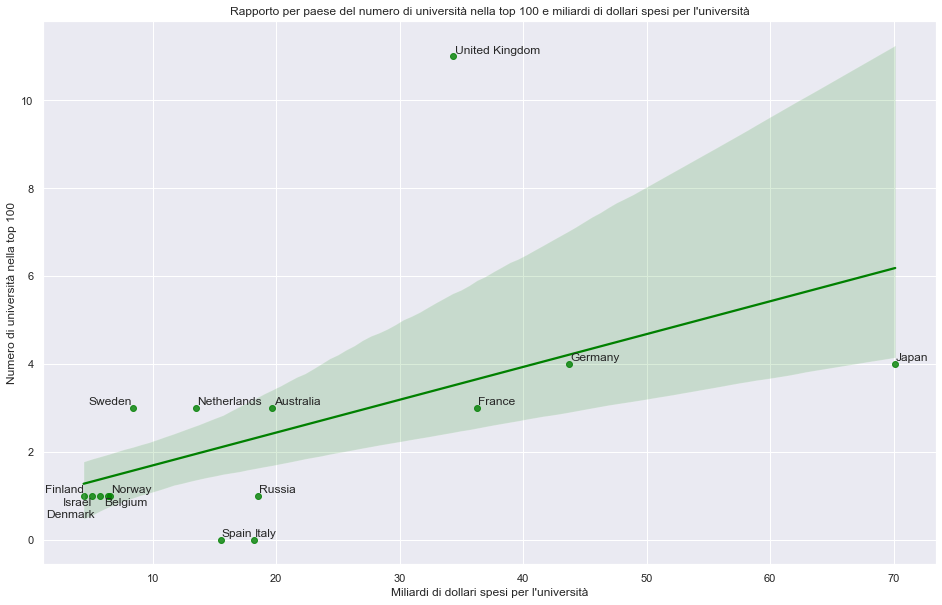

In [100]:
df_flist_m2nous = df_flist_m2.loc[1:,:]
df_flist_m2nous.reset_index(inplace=True)

plt.rcParams['figure.figsize']=16,10
x= df_flist_m2nous['Miliardi di dollari spesi per università']
y= df_flist_m2nous['Numero di università']
sns.set_theme(color_codes=True)
ax = sns.regplot(x, y,data=df_flist_m2nous,ci=80,color="green")
ax.grid(True)
plt.title("Rapporto per paese del numero di università nella top 100 e miliardi di dollari spesi per l'università")
plt.xlabel("Miliardi di dollari spesi per l'università")
plt.ylabel("Numero di università nella top 100")
textsus=[]

for i, txt in enumerate(df_flist_m2nous['country']):
    textsus.append(ax.text(df_flist_m2nous['Miliardi di dollari spesi per università'][i], df_flist_m2nous['Numero di università'][i], txt))
    
adjust_text(textsus)

La correlazione è leggermente più bassa ma comunque presente. Da questo grafico si nota che il paese più "efficiente" da questo punto di vista è il Regno Unito, rispetto a quello che spende raccoglie risultati importantissimi. Si vede bene che spende meno di Giappone, Francia e Germania e presenta un numero di università in Top 100 3/4 volte superiore a loro. Svezia e Olanda ottengono anche loro risultati sopra la media. Spagna e soprattutto Italia le peggiori anche in questo dato, spendono più di molti altri paesi ma non riescono ad avere università di alto livello. Russia e Giappone anche loro sotto la media.

**Si può trarre la conclusione che nel caso degli Stati Uniti i tanti soldi spesi per l'università determinano la qualità delle università così alta, ovviamente i tanti soldi oltre che per le stutture possono essere spesi per esperimenti, studi, nuove tecnologie, ecc., ma osservando il quadro generale degli altri paesi in cui la differenza di soldi spesi non è così alta tra di loro vediamo che non è una verità assoluta, infatti troviamo paesi che spendono meno di altri ed ottengono risultati migliori.**

## 5. Conclusioni <a class="anchor" id="fifth-bullet"></a>

Finite le analisi è ora delle conclusioni, riprendendo le tracce poste all'inizio del progetto:

### 5.1. Quali sono i paesi con le università migliori?

Sin dal 2005 da quando si è iniziato a valutare le università migliori al primo posto in classifica abbiamo trovato sempre gli Stati Uniti con netto distacco (circa la metà sulle prime 100 università sono quasi sempre americane) sul Regno Unito al secondo posto che a sua volta ha un netto distacco su principalmente Germania, Giappone, Svezia, Canada, Francia, Australia e Svizzera che occupano i posti successivi. Come dato geografico si può vedere che a livello continentale nessun paese dell'Europa meridionale, del Sud America e dell'Africa ha università di alto livello.

### 5.2. A paesi con università migliori corrispondono paesi più istruiti?

Facendo una valutazione a livello globale indicativamente sì, i paesi che hanno università migliori hanno sempre ottimi risultati su tutti i livelli di istruzione analizzati. Analizzando invece solamente i paesi selezionati da me con università migliori si vede che non sempre la classifica corrisponde, ad esempio la Corea del Sud con 1 sola università in Top 100 ha una percentuale di laureati più alta degli Stati Uniti. La Russia anch'essa con 1 sola università in Top 100 ha dati su tutti i livelli di istruzione molto alti. Osservando la parte bassa dei vari livelli di istruzione troviamo quasi sempre Cina (1 università in Top 100), Spagna (0) e Italia (0), il che effettivamente corrisponde. Quindi si può dire che un paese con università ottime tendenzialmente non avrà mai un livello di istruzione molto basso (nè viceversa), ma non c'è relazione diretta tra numero di università alte e istruzione del paese.

### 5.3 Il livello di istruzione di un paese corrisponde anche a un livello di "preparazione" maggiore?

Qui si può rispondere con certezza di no, avendo analizzato i risultati del PISA, del PIAAC e successivamente quelli dell'utilizzo di internet nel paese vediamo che non c'è mai corrispondenza tra i paesi più istruiti e quelli più preparati e competenti. Secondo i dati PISA (età 15 anni) i giovani più preparati del mondo sono tutti asiatici. Per quanto riguarda il mondo adulto (PIAAC) troviamo al primo posto il Giappone seguito però da tutti paesi del Nord Europa che non presentavano livelli di istruzione molto alti (soprattutto nella percentuale dei laureati). Regno Unito e soprattutto Stati Uniti mai al top in questi dati.

Bisogna comunque aggiungere a favore di Stati Uniti e Regno Unito che tutte le invenzioni più importanti degli ultimi anni vengono da questi paesi che anche grazie alle università migliori del mondo riescono ad avere menti geniali che stanno cambiando il mondo. Riescono ad avere quindi menti eccellenti ma sono una piccola percentuale in confronto alla popolazione totale.

### 5.4 I paesi che spendono di più per l'università sono gli stessi che hanno università migliori?

Tendenzialmente sì, soprattutto nel caso degli Stati Uniti dove c'è una quantità di soldi spesi veramente sproporzionata rispetto agli altri paesi. Quando la quantità di soldi spesi non è così esagerata ogni paese ha modo di "giocarsela" meglio, chi lo fa meglio di tutti è il Regno Unito che spendendo meno di altri paesi ottiene risultati eccellenti da questo punto di vista.